Name: Mahesh kumar dhaker

Roll: 213110037

MTP: 'Deep learning to predict mechanical properties of FDM products'

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [92]:
df=pd.read_excel('/content/drive/MyDrive/FDM_MTP/FDM_tensile_elastic_dataset.xlsx')
df.head()

,Layer height (mm),Raster angle (°),Infill density (%),Average ultimate tensile strength (MPa),Average elastic modulus (MPa)
0,0.4,45,40,24.73,617.58
1,0.4,45,60,28.89,635.98
2,0.4,45,80,30.78,714.64
3,0.4,55,40,27.93,617.98
4,0.4,55,60,29.76,633.26


In [93]:
df.columns

Index(['Layer height (mm)', 'Raster angle (°)', 'Infill density (%)',
       ' Average ultimate tensile strength (MPa)',
       'Average elastic modulus (MPa)'],
      dtype='object')

In [94]:
df.shape

(54, 5)

## The df.info() function provides a concise summary of a Pandas DataFrame, displaying information such as the column names, data types, and the number of non-null values in each column.

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Layer height (mm)                         54 non-null     float64
 1   Raster angle (°)                          54 non-null     int64  
 2   Infill density (%)                        54 non-null     int64  
 3    Average ultimate tensile strength (MPa)  54 non-null     float64
 4   Average elastic modulus (MPa)             54 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 2.2 KB


## The df.describe() function provides a statistical summary of a Pandas DataFrame. This summary includes various descriptive statistics for each numerical column in the DataFrame, such as count, mean, standard deviation, minimum, quartiles, and maximum values.

In [96]:
df.describe()

,Layer height (mm),Raster angle (°),Infill density (%),Average ultimate tensile strength (MPa),Average elastic modulus (MPa)
count,54.000000,54.000000,54.000000,54.000000,54.000000
mean,0.308333,57.500000,55.000000,27.102014,666.055879
std,0.131662,13.273253,21.609746,5.310556,121.640944
min,0.100000,40.000000,20.000000,9.737220,277.749500
25%,0.200000,45.000000,40.000000,24.260143,617.484900
50%,0.325000,57.500000,55.000000,27.970000,665.700655
75%,0.400000,65.000000,80.000000,31.155000,723.105000
max,0.500000,80.000000,80.000000,35.617760,952.173600


## Analysis for Layer thickness

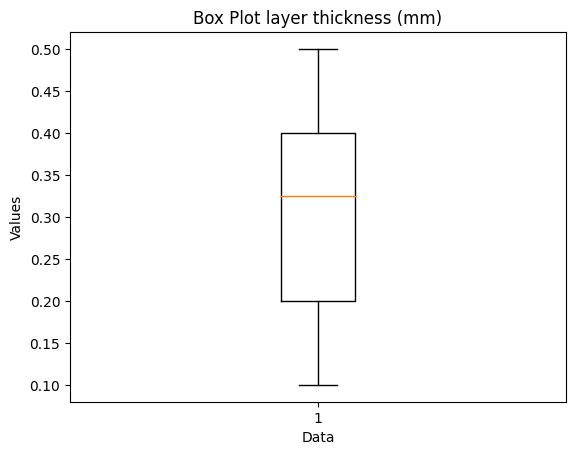

In [97]:
plt.boxplot(df['Layer height (mm)'])

# Set labels and title
plt.xlabel('Data')
plt.ylabel('Values')
plt.title('Box Plot layer thickness (mm)')
# Display the plot
plt.show()

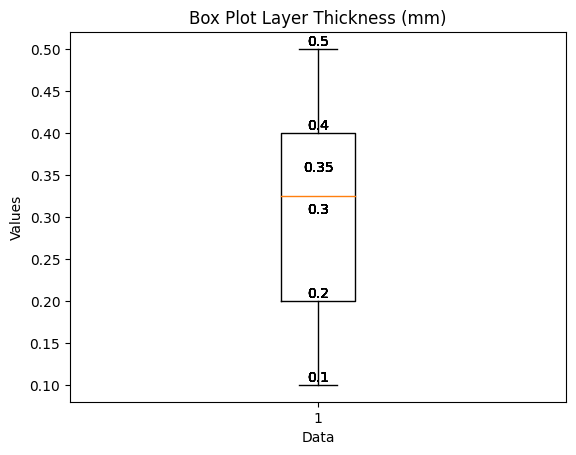

In [98]:
# Create the box plot
plt.boxplot(df['Layer height (mm)'])

# Set labels and title
plt.xlabel('Data')
plt.ylabel('Values')
plt.title('Box Plot Layer Thickness (mm)')

# Add value labels to the plot
values = df['Layer height (mm)']
x_pos = 1  # X position of the text

# Iterate over each value and add the text to the plot
for value in values:
    plt.text(x_pos, value, str(value), ha='center', va='bottom')

# Display the updated plot with value labels
plt.show()


**Histogram**

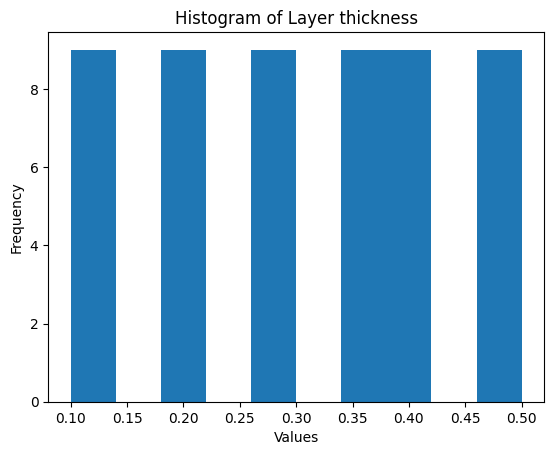

In [99]:
plt.hist(df['Layer height (mm)'], bins=10)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Layer thickness')
plt.show()

## Raster angle

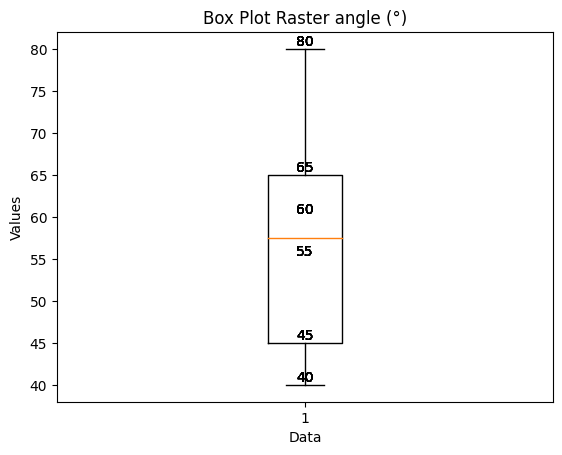

In [100]:
plt.boxplot(df['Raster angle (°)'])

# Set labels and title
plt.xlabel('Data')
plt.ylabel('Values')
plt.title('Box Plot Raster angle (°)')
# Add value labels to the plot
values = df['Raster angle (°)']
x_pos = 1  # X position of the text

# Iterate over each value and add the text to the plot
for value in values:
    plt.text(x_pos, value, str(value), ha='center', va='bottom')

# Display the plot
plt.show()

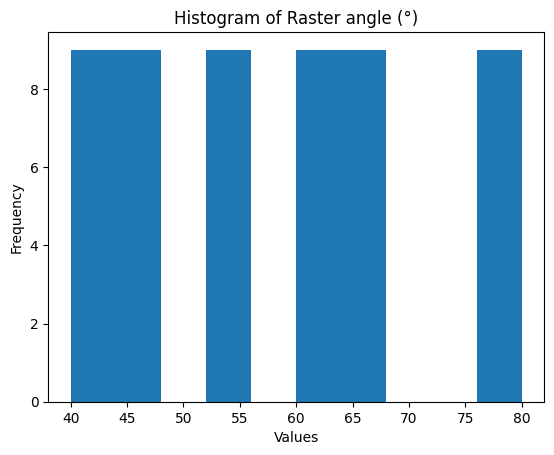

In [101]:
plt.hist(df['Raster angle (°)'], bins=10)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Raster angle (°)')
plt.show()

## Infill density

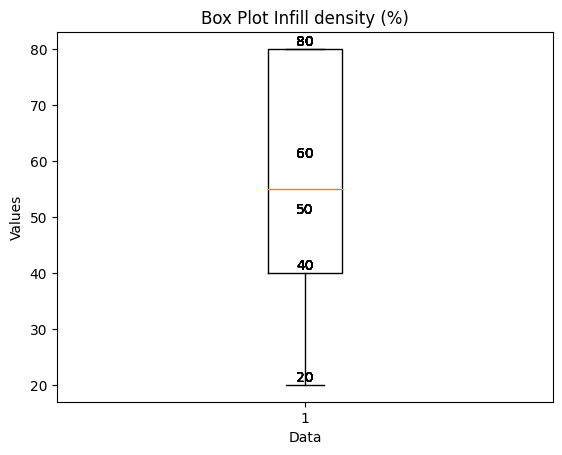

In [102]:
plt.boxplot(df['Infill density (%)'])

# Set labels and title
plt.xlabel('Data')
plt.ylabel('Values')
plt.title('Box Plot Infill density (%)')
# Add value labels to the plot
values = df['Infill density (%)']
x_pos = 1  # X position of the text

# Iterate over each value and add the text to the plot
for value in values:
    plt.text(x_pos, value, str(value), ha='center', va='bottom')

# Display the plot
plt.show()

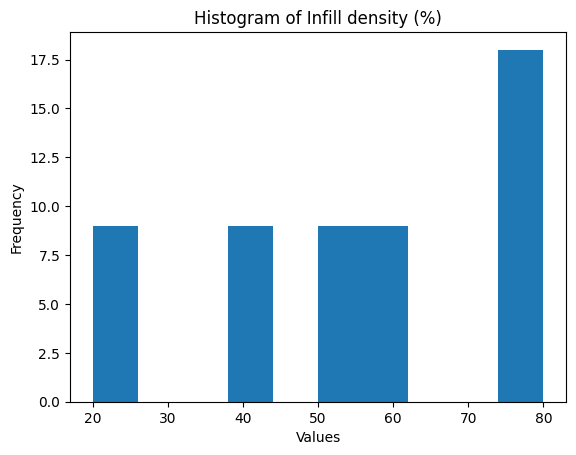

In [103]:
plt.hist(df['Infill density (%)'], bins=10)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Infill density (%)')
plt.show()

## UTS

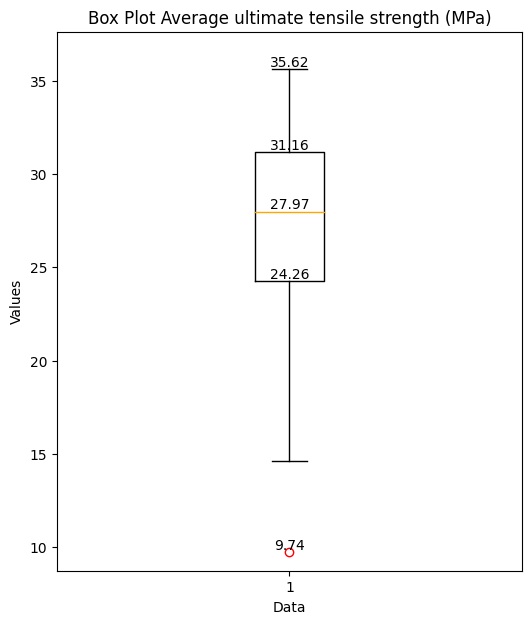

In [104]:
plt.figure(figsize=(6, 7))
bp = plt.boxplot(df[' Average ultimate tensile strength (MPa)'], showfliers=True,    boxprops=dict(color='black'), whiskerprops=dict(color='black'),
                 capprops=dict(color='black'), medianprops=dict(color='orange'),
                 flierprops=dict(markeredgecolor='red'))

# Set labels and title
plt.xlabel('Data')
plt.ylabel('Values')
plt.title('Box Plot Average ultimate tensile strength (MPa)')

# Extract the statistical values from the boxplot dictionary
medians = [median.get_ydata()[0] for median in bp['medians']]
q1 = [q1.get_ydata()[0] for q1 in bp['boxes']]
q3 = [q3.get_ydata()[2] for q3 in bp['boxes']]

# Calculate the minimum and maximum values
minimum = np.min(df[' Average ultimate tensile strength (MPa)'])
maximum = np.max(df[' Average ultimate tensile strength (MPa)'])


# Add the statistical values as text to the plot
plt.text(1, medians[0], str(round(medians[0], 2)), ha='center', va='bottom')
plt.text(1, q1[0], str(round(q1[0], 2)), ha='center', va='bottom')
plt.text(1, q3[0], str(round(q3[0], 2)), ha='center', va='bottom')
plt.text(1, minimum, str(round(minimum, 2)), ha='center', va='bottom')
plt.text(1, maximum, str(round(maximum, 2)), ha='center', va='bottom')

# Set the limits of the y-axis
plt.ylim(minimum-1, maximum+2)
# Display the plot
plt.show()


In [105]:
Q1 = df[' Average ultimate tensile strength (MPa)'].quantile(0.25)
Q3 = df[' Average ultimate tensile strength (MPa)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df[' Average ultimate tensile strength (MPa)'] >= lower_bound) & (df[' Average ultimate tensile strength (MPa)'] <= upper_bound)]

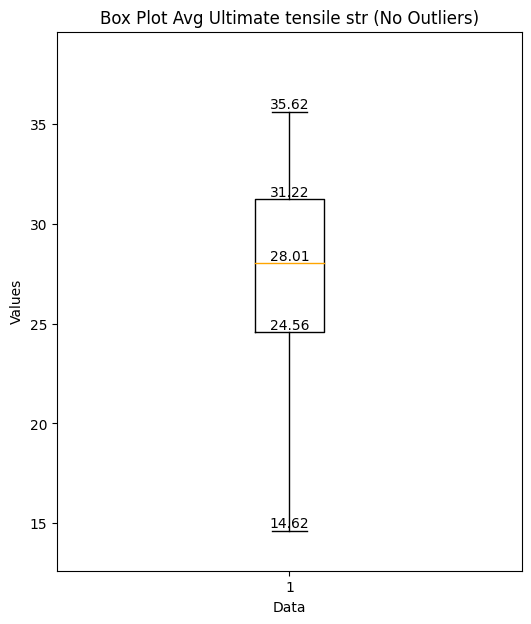

In [106]:
plt.figure(figsize=(6, 7))

# Create the box plot for the remaining data
bp = plt.boxplot(df_no_outliers[' Average ultimate tensile strength (MPa)'],
                 boxprops=dict(color='black'), whiskerprops=dict(color='black'),
                 capprops=dict(color='black'), medianprops=dict(color='orange'))

# Set labels and title
plt.xlabel('Data')
plt.ylabel('Values')
plt.title('Box Plot Avg Ultimate tensile str (No Outliers)')

# Extract the statistical values from the boxplot dictionary
medians = [median.get_ydata()[0] for median in bp['medians']]
q1 = [q1.get_ydata()[0] for q1 in bp['boxes']]
q3 = [q3.get_ydata()[2] for q3 in bp['boxes']]

# Calculate the minimum and maximum values
minimum = np.min(df_no_outliers[' Average ultimate tensile strength (MPa)'])
maximum = np.max(df_no_outliers[' Average ultimate tensile strength (MPa)'])

# Add the statistical values as text to the plot
plt.text(1, medians[0], str(round(medians[0], 2)), ha='center', va='bottom')
plt.text(1, q1[0], str(round(q1[0], 2)), ha='center', va='bottom')
plt.text(1, q3[0], str(round(q3[0], 2)), ha='center', va='bottom')
plt.text(1, minimum, str(round(minimum, 2)), ha='center', va='bottom')
plt.text(1, maximum, str(round(maximum, 2)), ha='center', va='bottom')

# Set the limits of the y-axis
plt.ylim(minimum - 2, maximum + 4)

# Display the plot
plt.show()

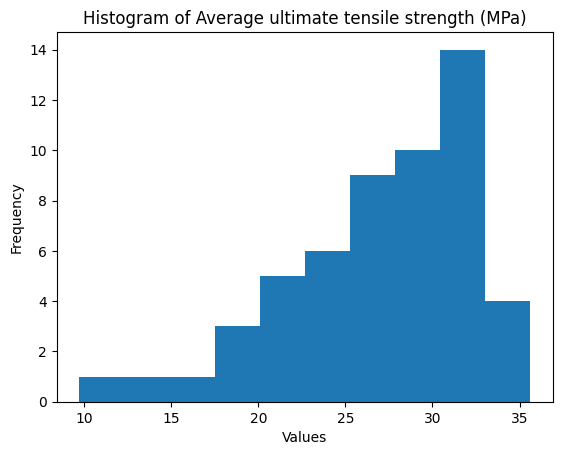

In [107]:
plt.hist(df[' Average ultimate tensile strength (MPa)'], bins=10)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Average ultimate tensile strength (MPa)')
plt.show()

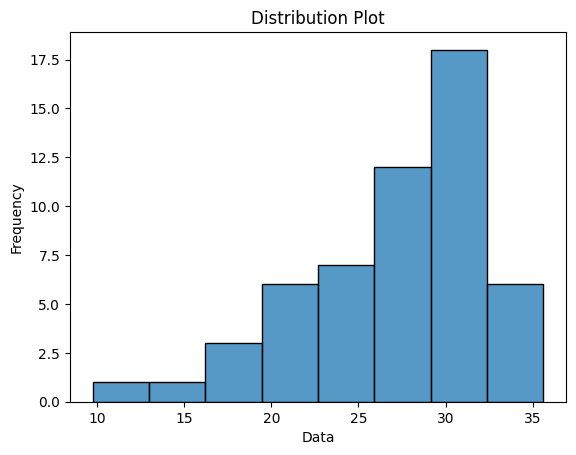

In [108]:
sns.histplot(df[' Average ultimate tensile strength (MPa)'])

# Set labels and title
plt.xlabel('Data')
plt.ylabel('Frequency')
plt.title('Distribution Plot')

# Display the plot
plt.show()

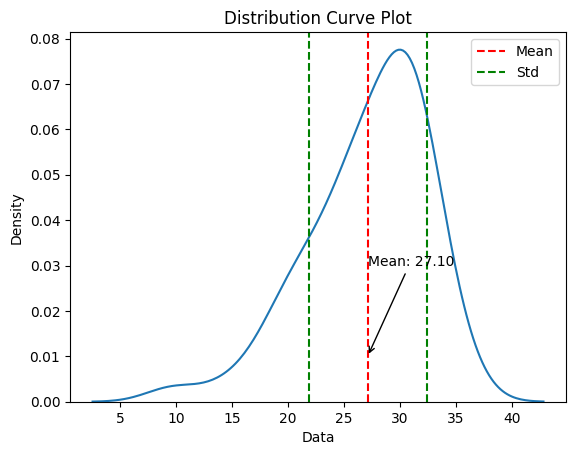

In [109]:
data =df[' Average ultimate tensile strength (MPa)']

# Calculate mean and standard deviation
mean = np.mean(data)
std = np.std(data)

# Create a distribution curve plot
sns.kdeplot(data)

# Set labels and title
plt.xlabel('Data')
plt.ylabel('Density')
plt.title('Distribution Curve Plot')

# Add annotations for mean and standard deviation
plt.axvline(mean, color='red', linestyle='--', label='Mean')
plt.annotate(f'Mean: {mean:.2f}', xy=(mean, 0.01), xytext=(mean, 0.03),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.axvline(mean + std, color='green', linestyle='--', label='Std')
plt.axvline(mean - std, color='green', linestyle='--')

# Display the legend
plt.legend()

# Display the plot
plt.show()

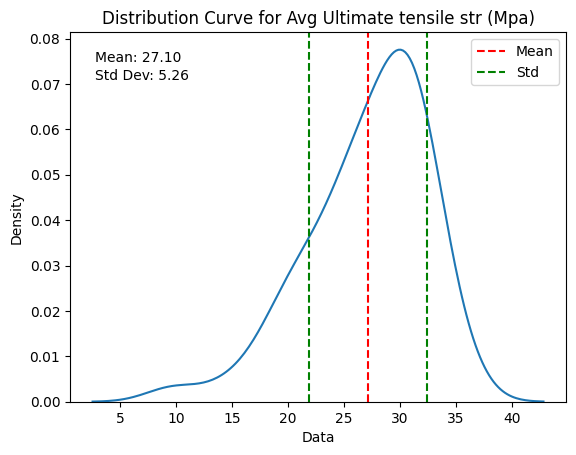

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate mean and standard deviation
mean = np.mean(df[' Average ultimate tensile strength (MPa)'])
std = np.std(df[' Average ultimate tensile strength (MPa)'])

# Create a distribution curve plot
sns.kdeplot(df[' Average ultimate tensile strength (MPa)'])

# Set labels and title
plt.xlabel('Data')
plt.ylabel('Density')
plt.title('Distribution Curve for Avg Ultimate tensile str (Mpa)')

# Add annotations for mean and standard deviation
plt.axvline(mean, color='red', linestyle='--', label='Mean')
plt.axvline(mean + std, color='green', linestyle='--', label='Std')
plt.axvline(mean - std, color='green', linestyle='--')

# Add numerical values in the left corner
plt.text(0.05, 0.95, f'Mean: {mean:.2f}', ha='left', va='top', transform=plt.gca().transAxes)
plt.text(0.05, 0.9, f'Std Dev: {std:.2f}', ha='left', va='top', transform=plt.gca().transAxes)

# Display the legend
plt.legend()

# Display the plot
plt.show()

## Elastic Modulus

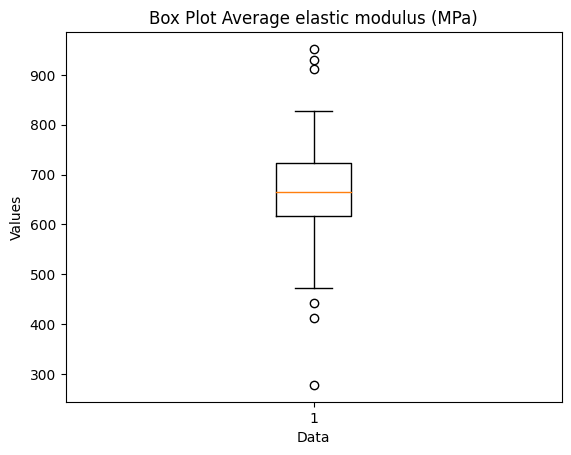

In [111]:
plt.boxplot(df['Average elastic modulus (MPa)'])

# Set labels and title
plt.xlabel('Data')
plt.ylabel('Values')
plt.title('Box Plot Average elastic modulus (MPa)')
# Display the plot
plt.show()

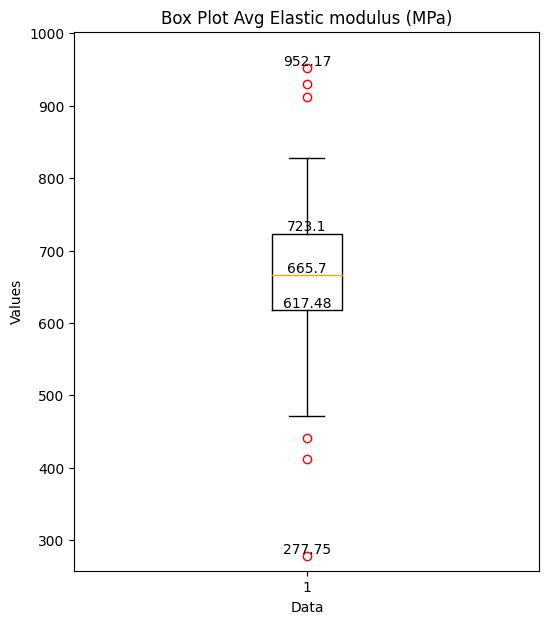

In [112]:
plt.figure(figsize=(6, 7))
bp = plt.boxplot(df['Average elastic modulus (MPa)'], showfliers=True,    boxprops=dict(color='black'), whiskerprops=dict(color='black'),
                 capprops=dict(color='black'), medianprops=dict(color='orange'),
                 flierprops=dict(markeredgecolor='red'))

# Set labels and title
plt.xlabel('Data')
plt.ylabel('Values')
plt.title('Box Plot Avg Elastic modulus (MPa)')

# Extract the statistical values from the boxplot dictionary
medians = [median.get_ydata()[0] for median in bp['medians']]
q1 = [q1.get_ydata()[0] for q1 in bp['boxes']]
q3 = [q3.get_ydata()[2] for q3 in bp['boxes']]

# Calculate the minimum and maximum values
minimum = np.min(df['Average elastic modulus (MPa)'])
maximum = np.max(df['Average elastic modulus (MPa)'])


# Add the statistical values as text to the plot
plt.text(1, medians[0], str(round(medians[0], 2)), ha='center', va='bottom')
plt.text(1, q1[0], str(round(q1[0], 2)), ha='center', va='bottom')
plt.text(1, q3[0], str(round(q3[0], 2)), ha='center', va='bottom')
plt.text(1, minimum, str(round(minimum, 2)), ha='center', va='bottom')
plt.text(1, maximum, str(round(maximum, 2)), ha='center', va='bottom')

# Set the limits of the y-axis
plt.ylim(minimum-20, maximum+50)
# Display the plot
plt.show()


In [113]:
Q1 = df['Average elastic modulus (MPa)'].quantile(0.25)
Q3 = df['Average elastic modulus (MPa)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['Average elastic modulus (MPa)'] >= lower_bound) & (df['Average elastic modulus (MPa)'] <= upper_bound)]


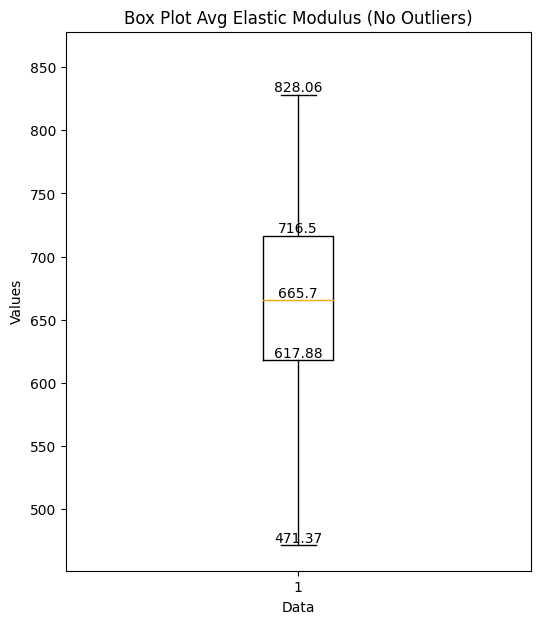

In [114]:
plt.figure(figsize=(6, 7))

# Create the box plot for the remaining data
bp = plt.boxplot(df_no_outliers['Average elastic modulus (MPa)'],
                 boxprops=dict(color='black'), whiskerprops=dict(color='black'),
                 capprops=dict(color='black'), medianprops=dict(color='orange'))

# Set labels and title
plt.xlabel('Data')
plt.ylabel('Values')
plt.title('Box Plot Avg Elastic Modulus (No Outliers)')

# Extract the statistical values from the boxplot dictionary
medians = [median.get_ydata()[0] for median in bp['medians']]
q1 = [q1.get_ydata()[0] for q1 in bp['boxes']]
q3 = [q3.get_ydata()[2] for q3 in bp['boxes']]

# Calculate the minimum and maximum values
minimum = np.min(df_no_outliers['Average elastic modulus (MPa)'])
maximum = np.max(df_no_outliers['Average elastic modulus (MPa)'])

# Add the statistical values as text to the plot
plt.text(1, medians[0], str(round(medians[0], 2)), ha='center', va='bottom')
plt.text(1, q1[0], str(round(q1[0], 2)), ha='center', va='bottom')
plt.text(1, q3[0], str(round(q3[0], 2)), ha='center', va='bottom')
plt.text(1, minimum, str(round(minimum, 2)), ha='center', va='bottom')
plt.text(1, maximum, str(round(maximum, 2)), ha='center', va='bottom')

# Set the limits of the y-axis
plt.ylim(minimum - 20, maximum + 50)

# Display the plot
plt.show()


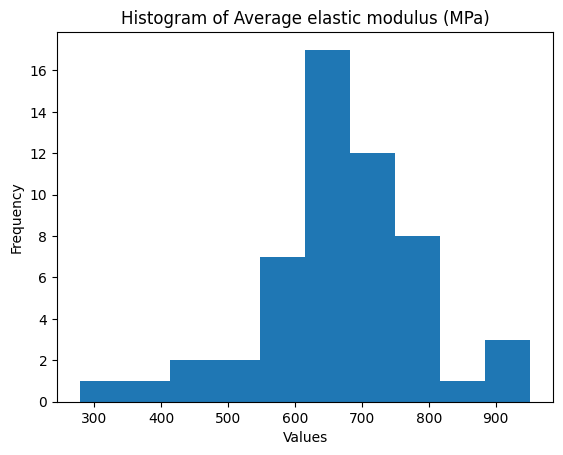

In [115]:
plt.hist(df['Average elastic modulus (MPa)'], bins=10)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Average elastic modulus (MPa)')
plt.show()

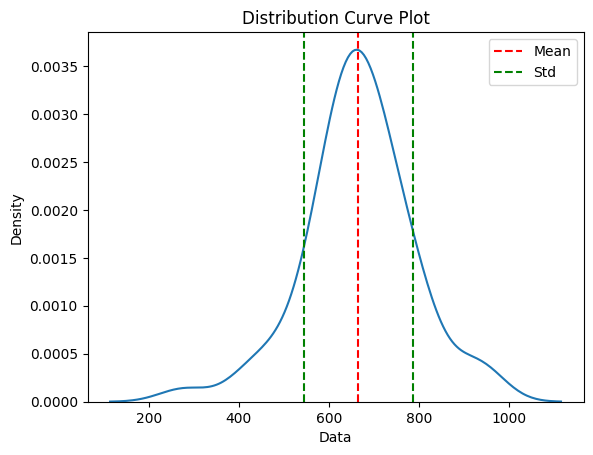

In [116]:
# Calculate mean and standard deviation
mean = np.mean(df['Average elastic modulus (MPa)'])
std = np.std(df['Average elastic modulus (MPa)'])

# Create a distribution curve plot
sns.kdeplot(df['Average elastic modulus (MPa)'])

# Set labels and title
plt.xlabel('Data')
plt.ylabel('Density')
plt.title('Distribution Curve Plot')

# Add annotations for mean and standard deviation
plt.axvline(mean, color='red', linestyle='--', label='Mean')
plt.annotate(f'Mean: {mean:.2f}', xy=(mean, 0.01), xytext=(mean, 0.03),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.axvline(mean + std, color='green', linestyle='--', label='Std')
plt.axvline(mean - std, color='green', linestyle='--')

# Display the legend
plt.legend()

# Display the plot
plt.show()

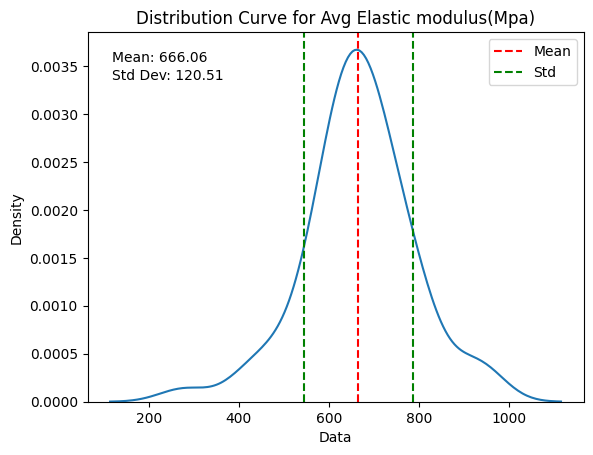

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate mean and standard deviation
mean = np.mean(df['Average elastic modulus (MPa)'])
std = np.std(df['Average elastic modulus (MPa)'])

# Create a distribution curve plot
sns.kdeplot(df['Average elastic modulus (MPa)'])

# Set labels and title
plt.xlabel('Data')
plt.ylabel('Density')
plt.title('Distribution Curve for Avg Elastic modulus(Mpa)')

# Add annotations for mean and standard deviation
plt.axvline(mean, color='red', linestyle='--', label='Mean')
plt.axvline(mean + std, color='green', linestyle='--', label='Std')
plt.axvline(mean - std, color='green', linestyle='--')

# Add numerical values in the left corner
plt.text(0.05, 0.95, f'Mean: {mean:.2f}', ha='left', va='top', transform=plt.gca().transAxes)
plt.text(0.05, 0.9, f'Std Dev: {std:.2f}', ha='left', va='top', transform=plt.gca().transAxes)

# Display the legend
plt.legend()

# Display the plot
plt.show()


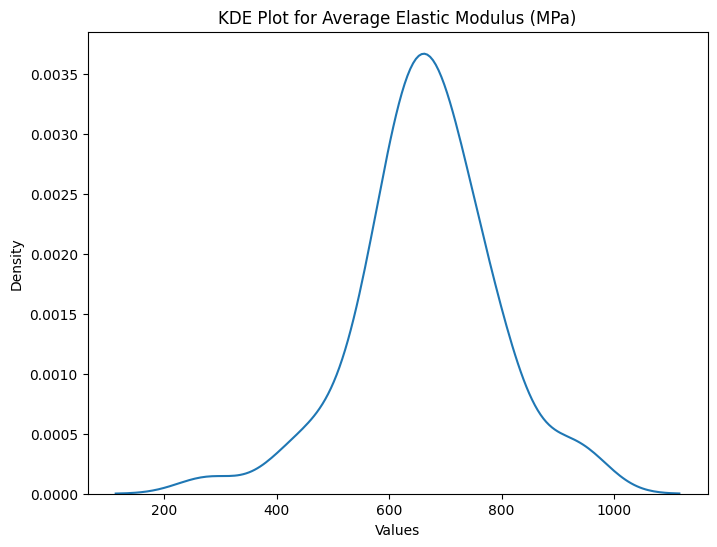

In [118]:
plt.figure(figsize=(8, 6))

# Create the KDE plot
sns.kdeplot(data=df['Average elastic modulus (MPa)'])

# Set labels and title
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('KDE Plot for Average Elastic Modulus (MPa)')

# Display the plot
plt.show()

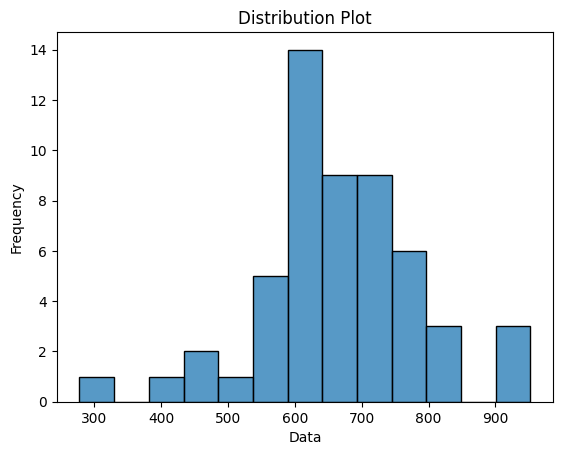

In [119]:
sns.histplot(df['Average elastic modulus (MPa)'])

# Set labels and title
plt.xlabel('Data')
plt.ylabel('Frequency')
plt.title('Distribution Plot')

# Display the plot
plt.show()

## The df.corr() function in Pandas is used to compute the pairwise correlation of columns in a DataFrame. It calculates the correlation coefficient between each pair of numerical columns and returns a correlation matrix.

In [120]:
df.corr()

,Layer height (mm),Raster angle (°),Infill density (%),Average ultimate tensile strength (MPa),Average elastic modulus (MPa)
Layer height (mm),1.000000,-0.157900,0.193972,0.513279,0.281652
Raster angle (°),-0.157900,1.000000,-0.044402,-0.051571,-0.008503
Infill density (%),0.193972,-0.044402,1.000000,0.769036,0.777860
Average ultimate tensile strength (MPa),0.513279,-0.051571,0.769036,1.000000,0.846883
Average elastic modulus (MPa),0.281652,-0.008503,0.777860,0.846883,1.000000


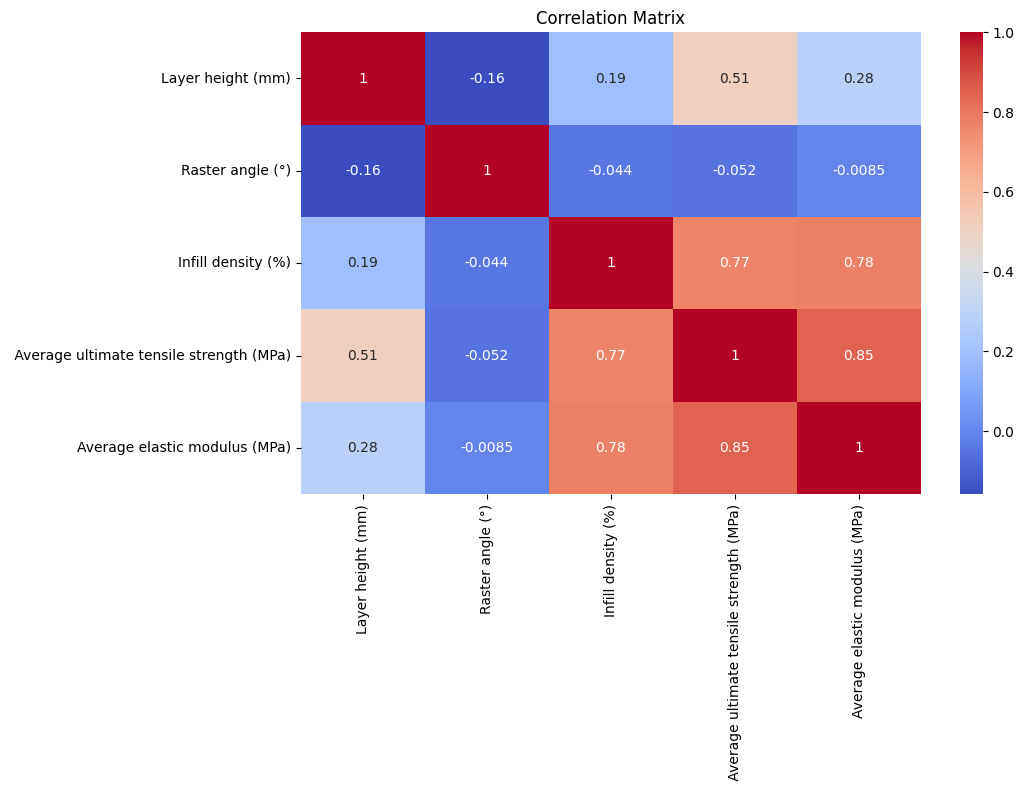

In [121]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.title('Correlation Matrix')
plt.xticks(rotation = 90)
plt.show()

# Features vs UTS

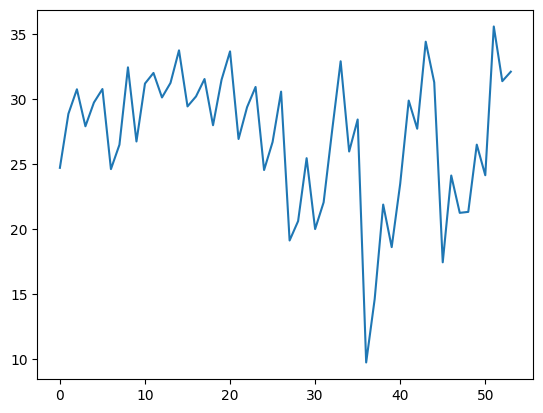

In [122]:
plt.plot(df[' Average ultimate tensile strength (MPa)'])
plt.show()

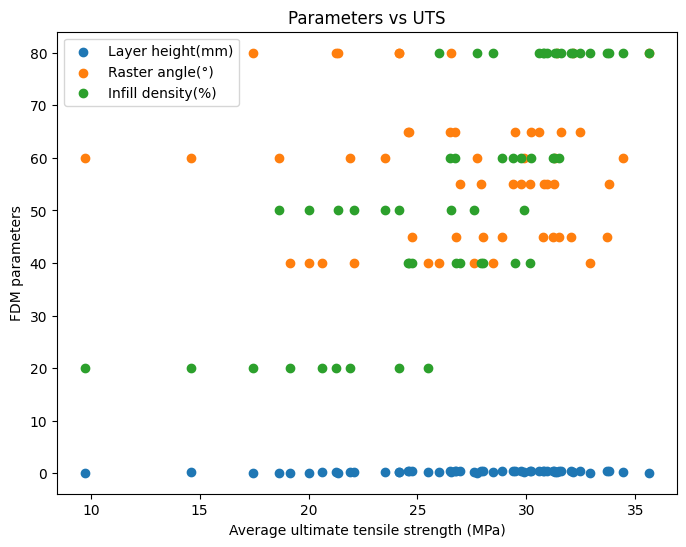

In [123]:
plt.figure(figsize=(8,6))
plt.scatter(df[' Average ultimate tensile strength (MPa)'],df['Layer height (mm)'], label = 'Layer height(mm)')
plt.scatter(df[' Average ultimate tensile strength (MPa)'], df['Raster angle (°)'],label = 'Raster angle(°)')
plt.scatter(df[' Average ultimate tensile strength (MPa)'], df['Infill density (%)'],label = 'Infill density(%)')
plt.legend()
plt.xlabel('Average ultimate tensile strength (MPa)')
plt.ylabel('FDM parameters')
plt.title('Parameters vs UTS')
plt.show()

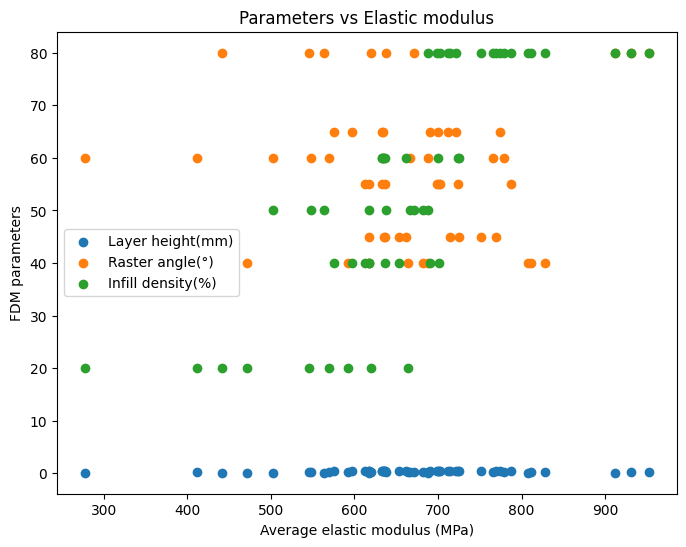

In [124]:
plt.figure(figsize=(8,6))
plt.scatter(df['Average elastic modulus (MPa)'],df['Layer height (mm)'], label = 'Layer height(mm)')
plt.scatter(df['Average elastic modulus (MPa)'], df['Raster angle (°)'],label = 'Raster angle(°)')
plt.scatter(df['Average elastic modulus (MPa)'], df['Infill density (%)'],label = 'Infill density(%)')
plt.legend()
plt.xlabel('Average elastic modulus (MPa)')
plt.ylabel('FDM parameters')
plt.title('Parameters vs Elastic modulus')
plt.show()

# ANOVA  and OLS

In [125]:
X=df.iloc[:,:3]
y1=df.iloc[:,3]

In [126]:
X

,Layer height (mm),Raster angle (°),Infill density (%)
0,0.40,45,40
1,0.40,45,60
2,0.40,45,80
3,0.40,55,40
4,0.40,55,60
5,0.40,55,80
6,0.40,65,40
7,0.40,65,60
8,0.40,65,80
9,0.50,45,40


In [127]:
y1

0     24.73000
1     28.89000
2     30.78000
3     27.93000
4     29.76000
5     30.80000
6     24.63000
7     26.51000
8     32.47000
9     26.76000
10    31.22000
11    32.04000
12    30.15000
13    31.27000
14    33.78000
15    29.46000
16    30.23000
17    31.57000
18    28.01000
19    31.51000
20    33.70000
21    26.95000
22    29.40000
23    30.96000
24    24.56000
25    26.72000
26    30.60000
27    19.13284
28    20.62756
29    25.47271
30    20.01269
31    22.07215
32    27.60767
33    32.93754
34    25.98610
35    28.45150
36     9.73722
37    14.62170
38    21.89921
39    18.62290
40    23.50263
41    29.91145
42    27.74211
43    34.44592
44    31.31328
45    17.45173
46    24.13670
47    21.26233
48    21.33669
49    26.51747
50    24.16019
51    35.61776
52    31.40398
53    32.13470
Name:  Average ultimate tensile strength (MPa), dtype: float64

In [128]:
import statsmodels.api as sm

In [129]:
from statsmodels.formula.api import ols

In [130]:
# Add a constant term to the design matrix X
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y1, X)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

                                       OLS Regression Results                                       
Dep. Variable:      Average ultimate tensile strength (MPa)   R-squared:                       0.731
Model:                                                  OLS   Adj. R-squared:                  0.715
Method:                                       Least Squares   F-statistic:                     45.23
Date:                                      Wed, 28 Jun 2023   Prob (F-statistic):           2.80e-14
Time:                                              14:12:06   Log-Likelihood:                -130.86
No. Observations:                                        54   AIC:                             269.7
Df Residuals:                                            50   BIC:                             277.7
Df Model:                                                 3                                         
Covariance Type:                                  nonrobust                                

In [131]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Add a constant term to the design matrix X
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y1, X)
results = model.fit()

# Perform ANOVA
formula ='df[" Average ultimate tensile strength (MPa)"] ~ df["Layer height (mm)"] + df["Raster angle (°)"] + df["Infill density (%)"]'
# formula = 'y1 ~ X'  # Replace X1, X2, X3 with your actual column names
anova_results = ols(formula, data=df).fit()
anova_table = sm.stats.anova_lm(anova_results)

# Print the summary of the regression results
print(results.summary())

# Print the ANOVA table
print("\nANOVA Table:")
print(anova_table)


                                       OLS Regression Results                                       
Dep. Variable:      Average ultimate tensile strength (MPa)   R-squared:                       0.731
Model:                                                  OLS   Adj. R-squared:                  0.715
Method:                                       Least Squares   F-statistic:                     45.23
Date:                                      Wed, 28 Jun 2023   Prob (F-statistic):           2.80e-14
Time:                                              14:12:06   Log-Likelihood:                -130.86
No. Observations:                                        54   AIC:                             269.7
Df Residuals:                                            50   BIC:                             277.7
Df Model:                                                 3                                         
Covariance Type:                                  nonrobust                                

In [132]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Add a constant term to the design matrix X
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y1, X)
results = model.fit()

# Perform ANOVA
formula ='df[" Average ultimate tensile strength (MPa)"] ~ df["Layer height (mm)"] + df["Raster angle (°)"] + df["Infill density (%)"]'
# formula = 'y1 ~ X'  # Replace X1, X2, X3 with your actual column names
anova_results = ols(formula, data=df).fit()
anova_table = sm.stats.anova_lm(anova_results)

# Print the summary of the regression results
print(results.summary2())

# Print the ANOVA table
print("\nANOVA Table:")
print(anova_table)


                            Results: Ordinary least squares
Model:              OLS                                     Adj. R-squared:     0.715   
Dependent Variable: Average ultimate tensile strength (MPa) AIC:                269.7112
Date:               2023-06-28 14:12                        BIC:                277.6672
No. Observations:   54                                      Log-Likelihood:     -130.86 
Df Model:           3                                       F-statistic:        45.23   
Df Residuals:       50                                      Prob (F-statistic): 2.80e-14
R-squared:          0.731                                   Scale:              8.0493  
--------------------------------------------------------------------------------------------
                           Coef.      Std.Err.       t        P>|t|       [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     11.9875     

In [133]:
X1=df.iloc[:,[0,2]]

In [134]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Add a constant term to the design matrix X
X1 = sm.add_constant(X1)

# Fit the multiple linear regression model
model = sm.OLS(y1, X1)
results = model.fit()

# Perform ANOVA
formula ='df[" Average ultimate tensile strength (MPa)"] ~ df["Layer height (mm)"] + df["Infill density (%)"]'
# formula = 'y1 ~ X'  # Replace X1, X2, X3 with your actual column names
anova_results = ols(formula, data=df).fit()
anova_table = sm.stats.anova_lm(anova_results)

# Print the summary of the regression results
print(results.summary2())

# Print the ANOVA table
print("\nANOVA Table:")
print(anova_table)


                            Results: Ordinary least squares
Model:              OLS                                     Adj. R-squared:     0.719   
Dependent Variable: Average ultimate tensile strength (MPa) AIC:                268.0241
Date:               2023-06-28 14:12                        BIC:                273.9911
No. Observations:   54                                      Log-Likelihood:     -131.01 
Df Model:           2                                       F-statistic:        68.66   
Df Residuals:       51                                      Prob (F-statistic): 3.42e-15
R-squared:          0.729                                   Scale:              7.9374  
--------------------------------------------------------------------------------------------
                          Coef.      Std.Err.        t        P>|t|       [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    12.9942      

In [135]:
X1

,const,Layer height (mm),Infill density (%)
0,1.0,0.40,40
1,1.0,0.40,60
2,1.0,0.40,80
3,1.0,0.40,40
4,1.0,0.40,60
5,1.0,0.40,80
6,1.0,0.40,40
7,1.0,0.40,60
8,1.0,0.40,80
9,1.0,0.50,40


In [136]:
y2=df.iloc[:,4]

In [137]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Add a constant term to the design matrix X
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y2, X)
results = model.fit()

# Perform ANOVA
formula ='df["Average elastic modulus (MPa)"] ~ df["Layer height (mm)"] + df["Raster angle (°)"] + df["Infill density (%)"]'
# formula = 'y1 ~ X'  # Replace X1, X2, X3 with your actual column names
anova_results = ols(formula, data=df).fit()
anova_table = sm.stats.anova_lm(anova_results)

# Print the summary of the regression results
print(results.summary2())

# Print the ANOVA table
print("\nANOVA Table:")
print(anova_table)

                       Results: Ordinary least squares
Model:              OLS                           Adj. R-squared:     0.603   
Dependent Variable: Average elastic modulus (MPa) AIC:                625.7819
Date:               2023-06-28 14:12              BIC:                633.7379
No. Observations:   54                            Log-Likelihood:     -308.89 
Df Model:           3                             F-statistic:        27.78   
Df Residuals:       50                            Prob (F-statistic): 1.02e-10
R-squared:          0.625                         Scale:              5881.0  
--------------------------------------------------------------------------------
                      Coef.     Std.Err.     t      P>|t|     [0.025     0.975] 
--------------------------------------------------------------------------------
const                367.3392    61.4000   5.9827   0.0000   244.0137   490.6647
Layer height (mm)    132.3484    82.5191   1.6039   0.1150   -33.396

In [138]:
data=df

In [139]:
data.head()

,Layer height (mm),Raster angle (°),Infill density (%),Average ultimate tensile strength (MPa),Average elastic modulus (MPa)
0,0.4,45,40,24.73,617.58
1,0.4,45,60,28.89,635.98
2,0.4,45,80,30.78,714.64
3,0.4,55,40,27.93,617.98
4,0.4,55,60,29.76,633.26


In [140]:
data

,Layer height (mm),Raster angle (°),Infill density (%),Average ultimate tensile strength (MPa),Average elastic modulus (MPa)
0,0.40,45,40,24.73000,617.58000
1,0.40,45,60,28.89000,635.98000
2,0.40,45,80,30.78000,714.64000
3,0.40,55,40,27.93000,617.98000
4,0.40,55,60,29.76000,633.26000
5,0.40,55,80,30.80000,701.83000
6,0.40,65,40,24.63000,575.51000
7,0.40,65,60,26.51000,634.07000
8,0.40,65,80,32.47000,722.07000
9,0.50,45,40,26.76000,653.85000


# Parameters vs UTS

In [141]:
data['Infill density (%)'].unique()

array([40, 60, 80, 20, 50])

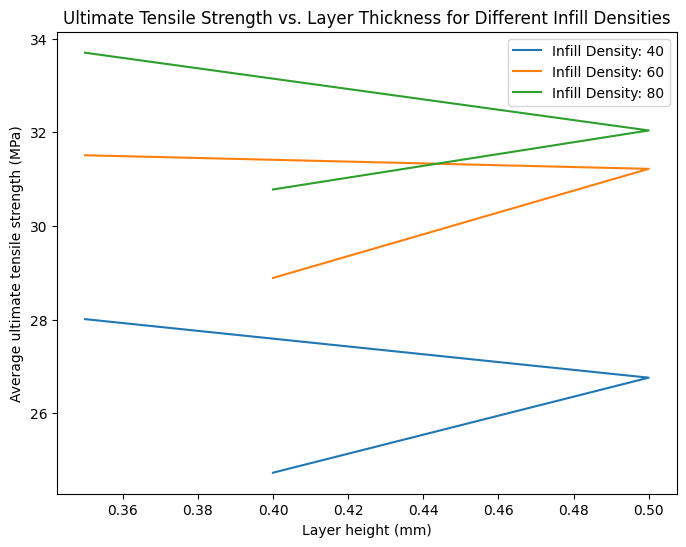

In [142]:
# Assuming your dataframe is named 'data'
# Column names: 'layer_height', 'raster_angle', 'infill_density', 'ultimate_tensile_strength'

# Filter the dataframe for a specific value of raster angle
constant_raster_angle = 45  # Enter your desired value of raster angle
filtered_data = data[data['Raster angle (°)'] == constant_raster_angle]

# Get unique infill density values
infill_densities = filtered_data['Infill density (%)'].unique()

# Set up the plot
plt.figure(figsize=(8, 6))
plt.xlabel('Layer height (mm)')
plt.ylabel('Average ultimate tensile strength (MPa)')

# Plot for each infill density value
for density in infill_densities:
    subset = filtered_data[filtered_data['Infill density (%)'] == density]
    plt.plot(subset['Layer height (mm)'], subset[' Average ultimate tensile strength (MPa)'], label=f'Infill Density: {density}')

# Add legend and title
plt.legend()
plt.title('Ultimate Tensile Strength vs. Layer Thickness for Different Infill Densities')

# Show the plot
plt.show()


In [143]:
data['Raster angle (°)'].unique()

array([45, 55, 65, 40, 60, 80])

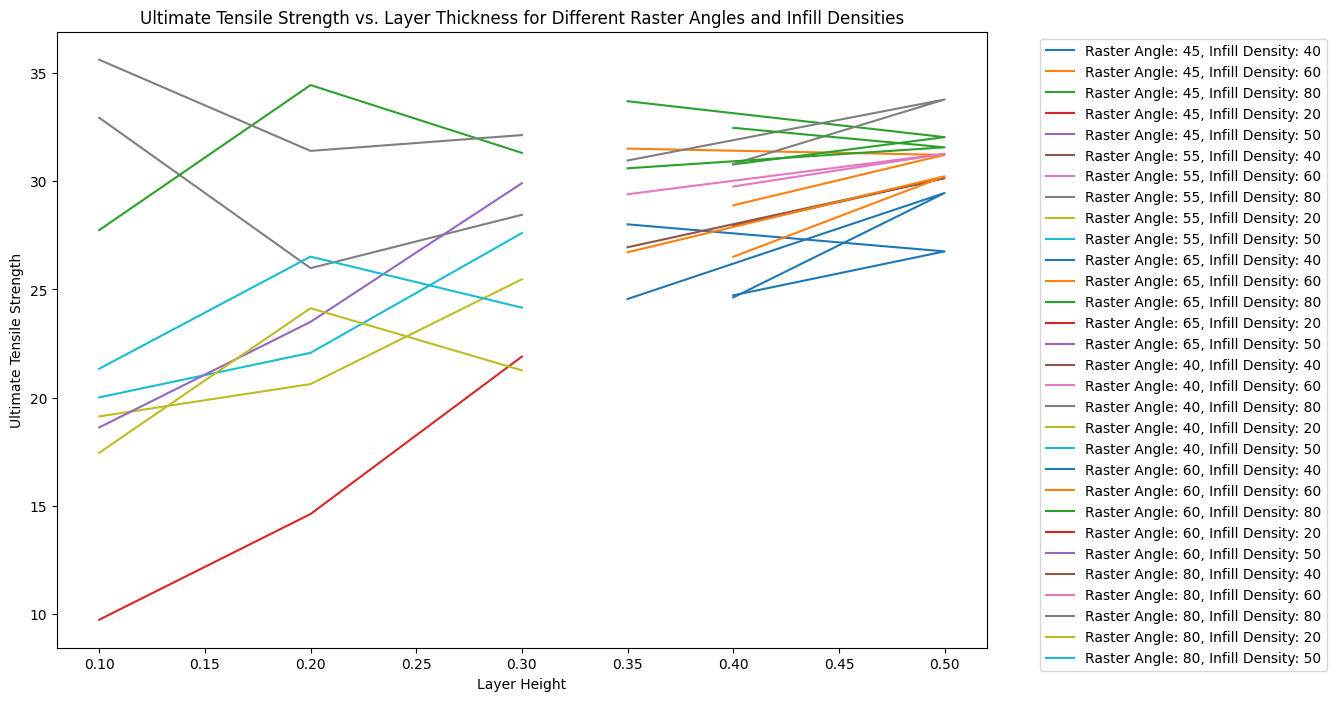

In [144]:
# Assuming your dataframe is named 'data'
# Column names: 'layer_height', 'raster_angle', 'infill_density', 'ultimate_tensile_strength'

# Get unique infill density values
infill_densities = data['Infill density (%)'].unique()

# Set up the plot
plt.figure(figsize=(12, 8))
plt.xlabel('Layer Height')
plt.ylabel('Ultimate Tensile Strength')

# Iterate over the desired raster angles
raster_angles = [45, 55, 65, 40, 60, 80]  # Add or modify the values as needed

# Plot for each raster angle and infill density value
for angle in raster_angles:
    filtered_data = data[data['Raster angle (°)'] == angle]

    for density in infill_densities:
        subset = filtered_data[filtered_data['Infill density (%)'] == density]
        label = f'Raster Angle: {angle}, Infill Density: {density}'
        plt.plot(subset['Layer height (mm)'], subset[' Average ultimate tensile strength (MPa)'], label=label)

# Add legend and title
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Ultimate Tensile Strength vs. Layer Thickness for Different Raster Angles and Infill Densities')

# Show the plot
plt.show()


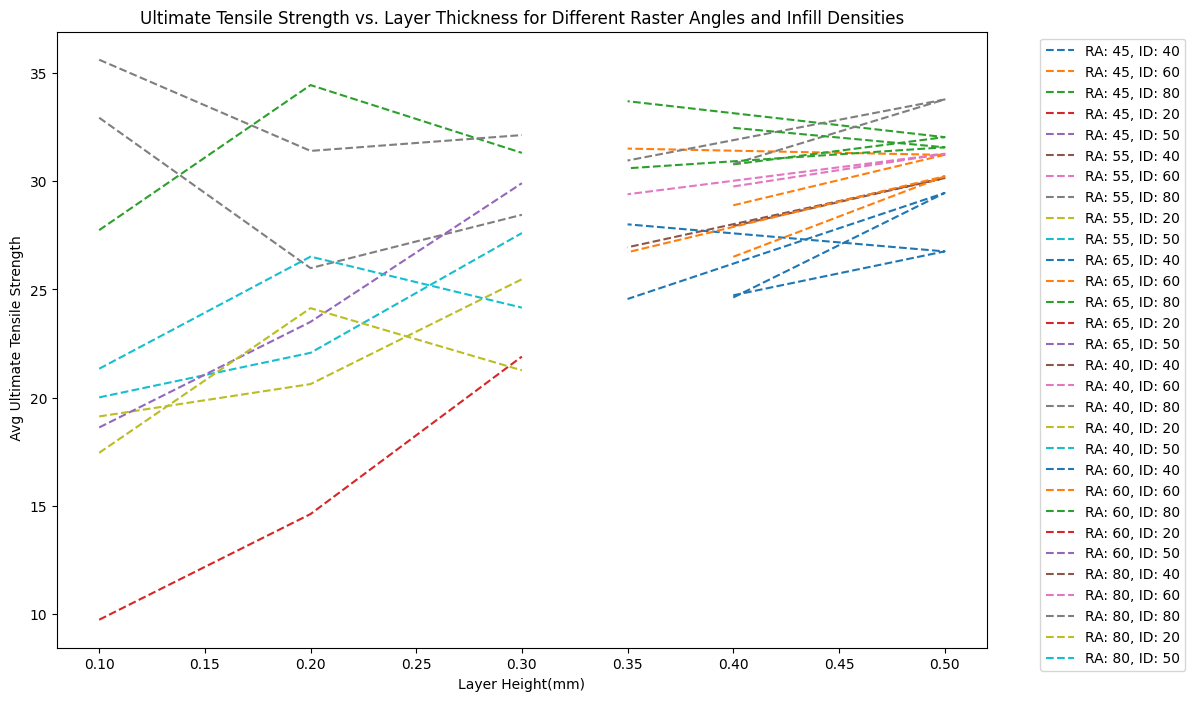

In [145]:
# Assuming your dataframe is named 'data'
# Column names: 'layer_height', 'raster_angle', 'infill_density', 'ultimate_tensile_strength'

# Get unique infill density values
infill_densities = data['Infill density (%)'].unique()

# Set up the plot
plt.figure(figsize=(12, 8))
plt.xlabel('Layer Height(mm)')
plt.ylabel(' Avg Ultimate Tensile Strength')

# Iterate over the desired raster angles
raster_angles = [45, 55, 65, 40, 60, 80]  # Add or modify the values as needed

# Plot for each raster angle and infill density value
for angle in raster_angles:
    filtered_data = data[data['Raster angle (°)'] == angle]

    for density in infill_densities:
        subset = filtered_data[filtered_data['Infill density (%)'] == density]
        label = f'RA: {angle}, ID: {density}'
        plt.plot(subset['Layer height (mm)'], subset[' Average ultimate tensile strength (MPa)'],linestyle='--', label=label)

# Add legend and title
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Ultimate Tensile Strength vs. Layer Thickness for Different Raster Angles and Infill Densities')

# Show the plot
plt.show()

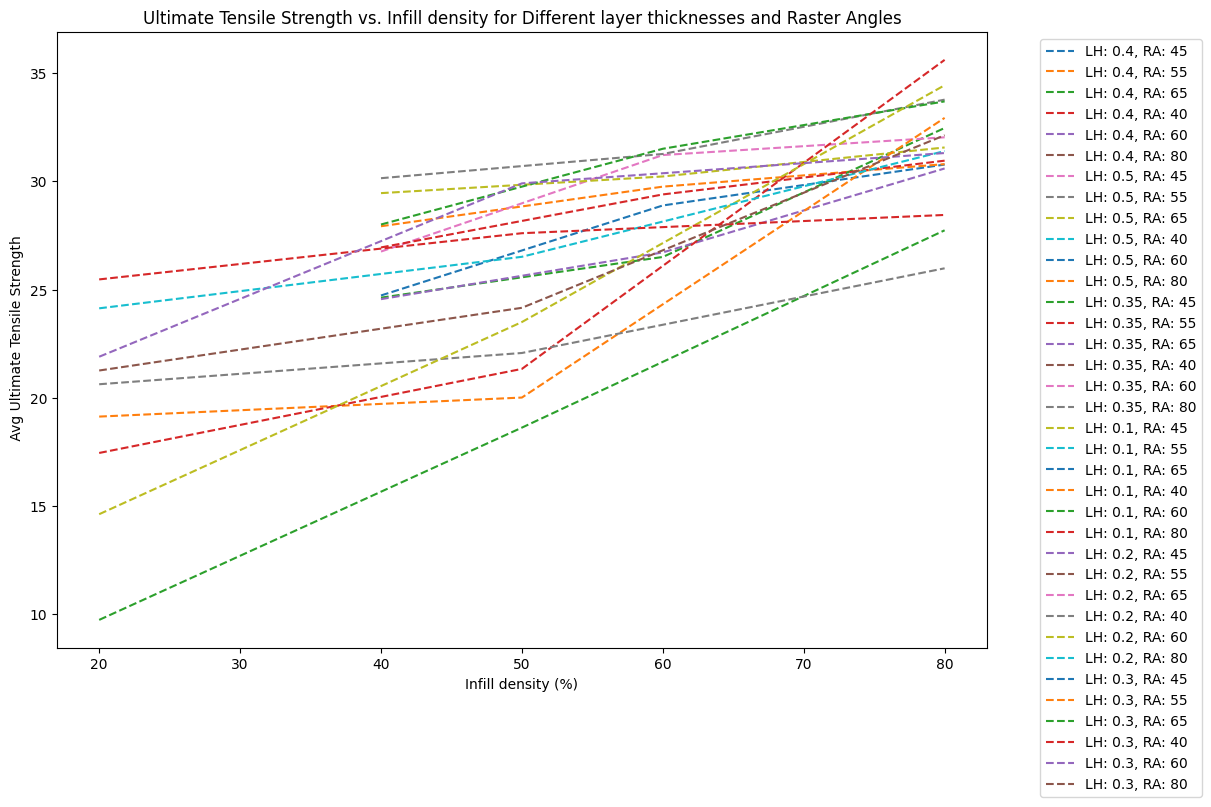

In [146]:
# Get unique infill density values
raster_angles = data['Raster angle (°)'].unique()

# Set up the plot
plt.figure(figsize=(12, 8))
plt.xlabel('Infill density (%)')
plt.ylabel(' Avg Ultimate Tensile Strength')

# Iterate over the desired raster angles
layer_heights= [0.4 , 0.5 , 0.35, 0.1 , 0.2 , 0.3 ]  # Add or modify the values as needed

# Plot for each raster angle and infill density value
for height in layer_heights:
    filtered_data = data[data['Layer height (mm)'] == height]

    for angle in raster_angles:
        subset = filtered_data[filtered_data['Raster angle (°)'] == angle]
        label = f'LH: {height}, RA: {angle}'
        plt.plot(subset['Infill density (%)'], subset[' Average ultimate tensile strength (MPa)'],linestyle='--', label=label)

# Add legend and title
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Ultimate Tensile Strength vs. Infill density for Different layer thicknesses and Raster Angles')

# Show the plot
plt.show()

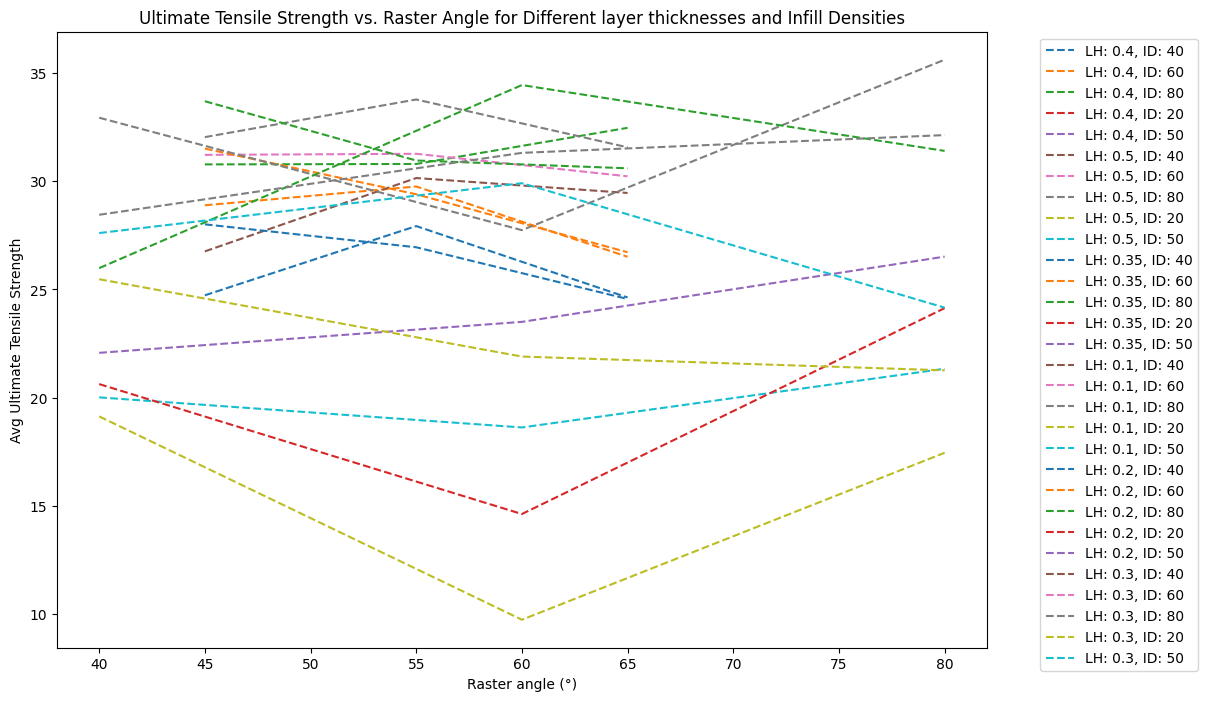

In [147]:
# Assuming your dataframe is named 'data'
# Column names: 'layer_height', 'raster_angle', 'infill_density', 'ultimate_tensile_strength'

# Get unique infill density values
infill_densities = data['Infill density (%)'].unique()

# Set up the plot
plt.figure(figsize=(12, 8))
plt.xlabel('Raster angle (°)')
plt.ylabel('Avg Ultimate Tensile Strength')

layer_heights= [0.4 , 0.5 , 0.35, 0.1 , 0.2 , 0.3 ]  # Add or modify the values as needed

# Plot for each raster angle and infill density value
for height in layer_heights:
    filtered_data = data[data['Layer height (mm)'] == height]

    for density in infill_densities:
        subset = filtered_data[filtered_data['Infill density (%)'] == density]
        label = f'LH: {height}, ID: {density}'
        plt.plot(subset['Raster angle (°)'], subset[' Average ultimate tensile strength (MPa)'],linestyle='--', label=label)

# Add legend and title
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Ultimate Tensile Strength vs. Raster Angle for Different layer thicknesses and Infill Densities')

# Show the plot
plt.show()

# Parameters vs Elastic modulus

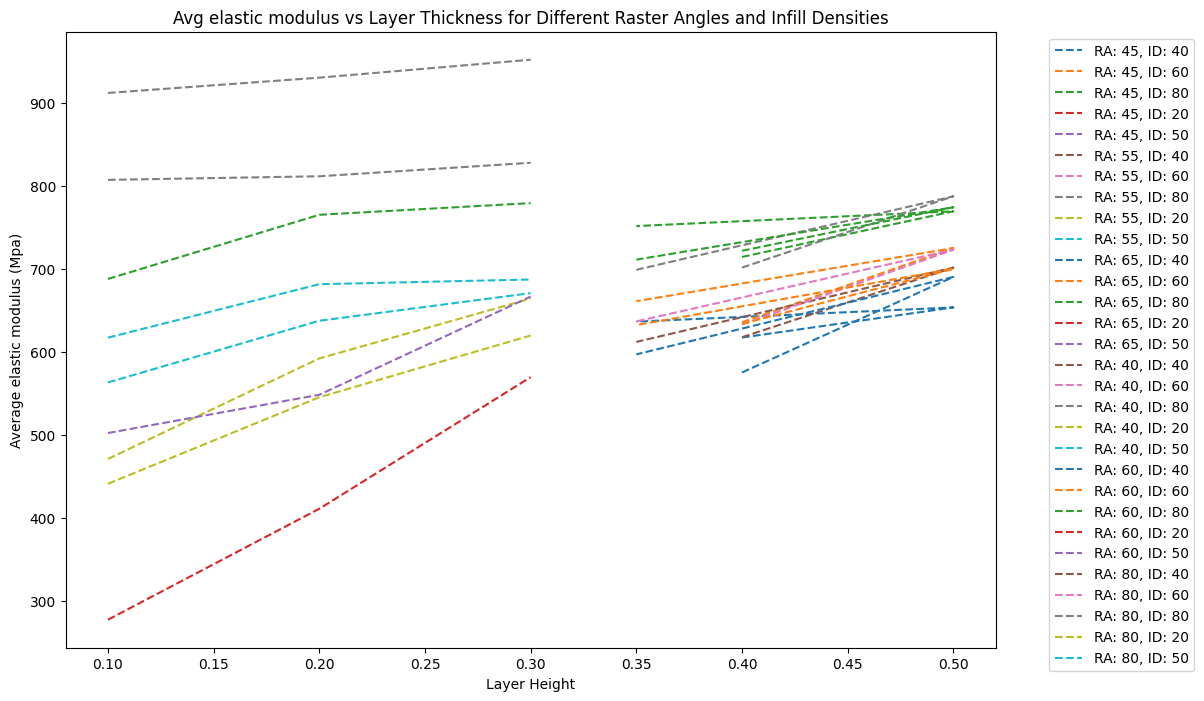

In [148]:
# Assuming your dataframe is named 'data'
# Column names: 'layer_height', 'raster_angle', 'infill_density', 'ultimate_tensile_strength'

# Get unique infill density values
infill_densities = data['Infill density (%)'].unique()

# Set up the plot
plt.figure(figsize=(12, 8))
plt.xlabel('Layer Height')
plt.ylabel('Average elastic modulus (Mpa)')

# Iterate over the desired raster angles
raster_angles = [45, 55, 65, 40, 60, 80]  # Add or modify the values as needed

# Plot for each raster angle and infill density value
for angle in raster_angles:
    filtered_data = data[data['Raster angle (°)'] == angle]

    for density in infill_densities:
        subset = filtered_data[filtered_data['Infill density (%)'] == density]
        label = f'RA: {angle}, ID: {density}'
        plt.plot(subset['Layer height (mm)'], subset['Average elastic modulus (MPa)'],linestyle='--', label=label)

# Add legend and title
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Avg elastic modulus vs Layer Thickness for Different Raster Angles and Infill Densities')

# Show the plot
plt.show()

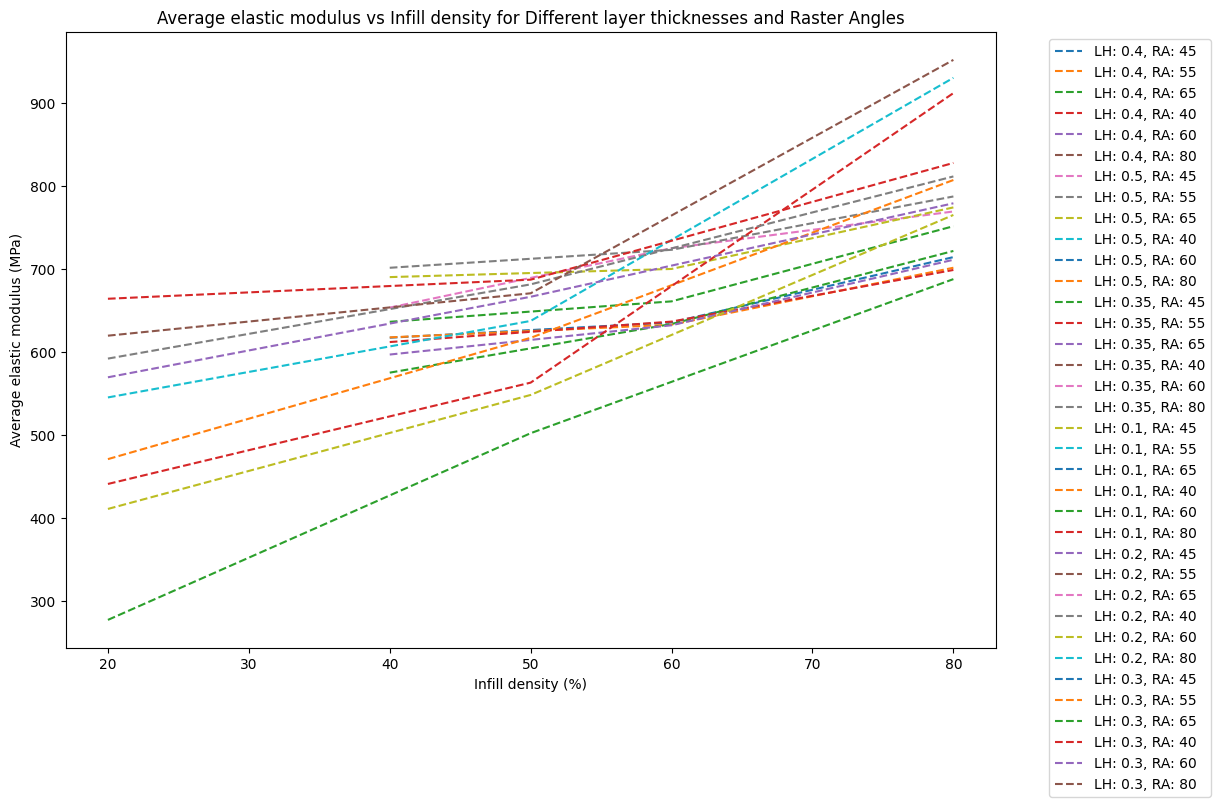

In [149]:
# Get unique infill density values
raster_angles = data['Raster angle (°)'].unique()

# Set up the plot
plt.figure(figsize=(12, 8))
plt.xlabel('Infill density (%)')
plt.ylabel('Average elastic modulus (MPa)')

# Iterate over the desired raster angles
layer_heights= [0.4 , 0.5 , 0.35, 0.1 , 0.2 , 0.3 ]  # Add or modify the values as needed

# Plot for each raster angle and infill density value
for height in layer_heights:
    filtered_data = data[data['Layer height (mm)'] == height]

    for angle in raster_angles:
        subset = filtered_data[filtered_data['Raster angle (°)'] == angle]
        label = f'LH: {height}, RA: {angle}'
        plt.plot(subset['Infill density (%)'], subset['Average elastic modulus (MPa)'],linestyle='--', label=label)

# Add legend and title
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Average elastic modulus vs Infill density for Different layer thicknesses and Raster Angles')

# Show the plot
plt.show()

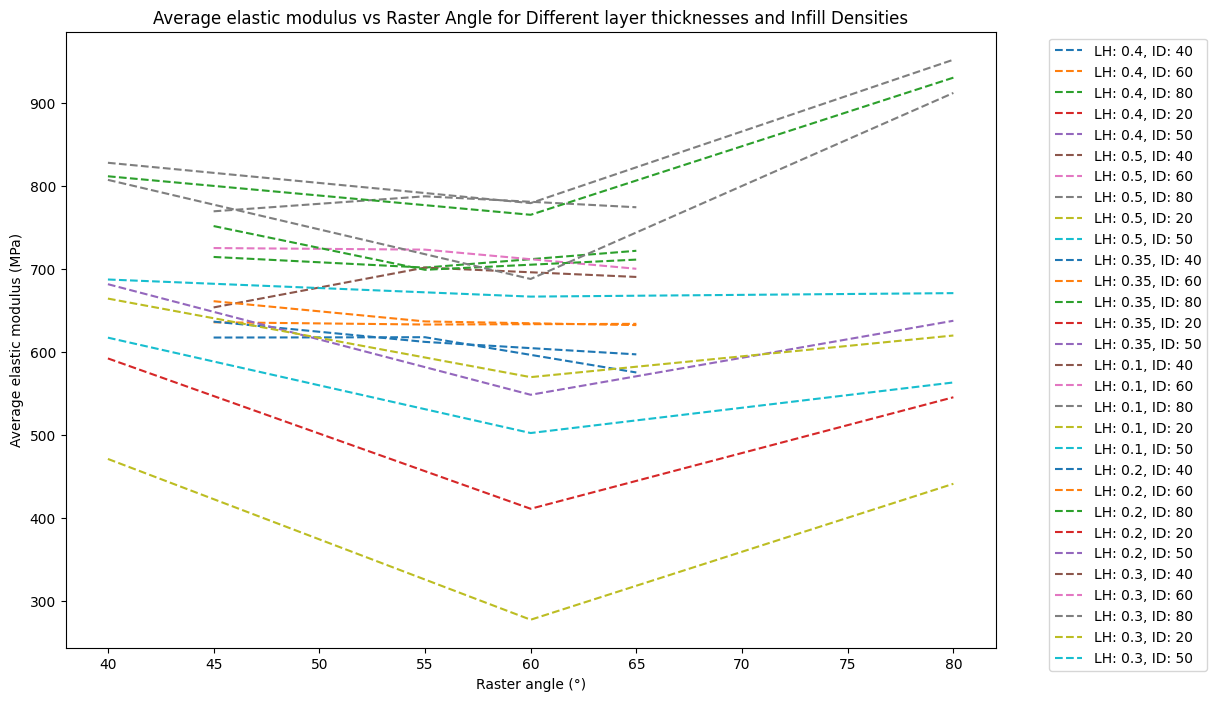

In [150]:
# Assuming your dataframe is named 'data'
# Column names: 'layer_height', 'raster_angle', 'infill_density', 'ultimate_tensile_strength'

# Get unique infill density values
infill_densities = data['Infill density (%)'].unique()

# Set up the plot
plt.figure(figsize=(12, 8))
plt.xlabel('Raster angle (°)')
plt.ylabel('Average elastic modulus (MPa)')

layer_heights= [0.4 , 0.5 , 0.35, 0.1 , 0.2 , 0.3 ]  # Add or modify the values as needed

# Plot for each raster angle and infill density value
for height in layer_heights:
    filtered_data = data[data['Layer height (mm)'] == height]

    for density in infill_densities:
        subset = filtered_data[filtered_data['Infill density (%)'] == density]
        label = f'LH: {height}, ID: {density}'
        plt.plot(subset['Raster angle (°)'], subset['Average elastic modulus (MPa)'],linestyle='--', label=label)

# Add legend and title
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Average elastic modulus vs Raster Angle for Different layer thicknesses and Infill Densities')

# Show the plot
plt.show()

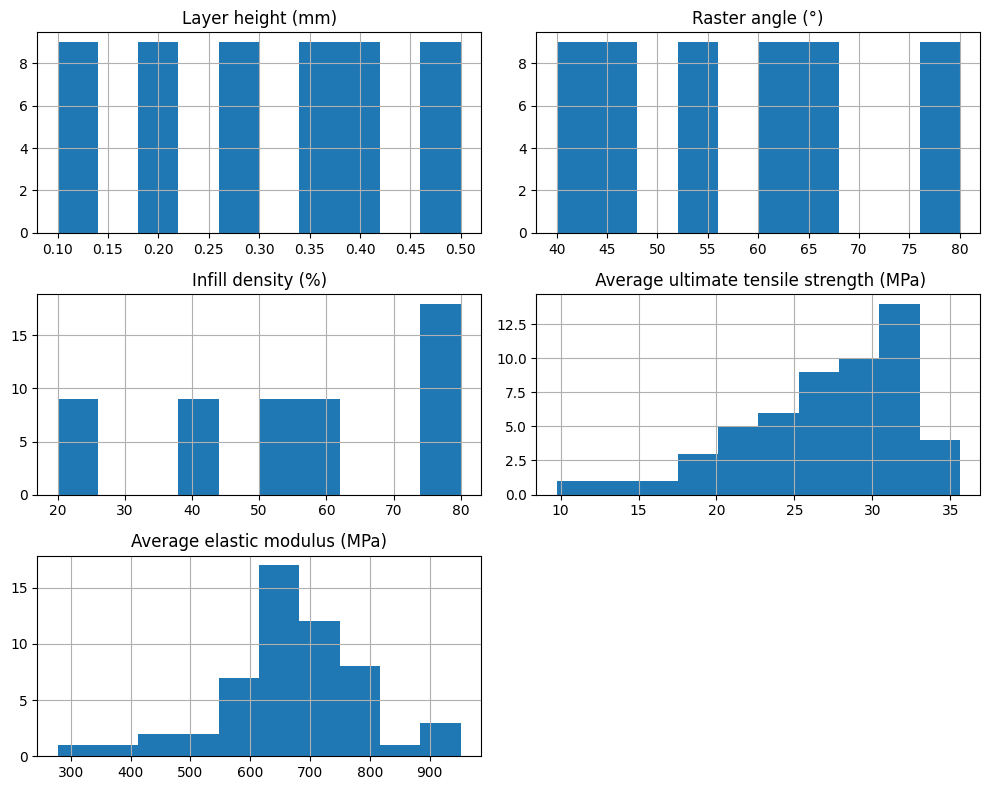

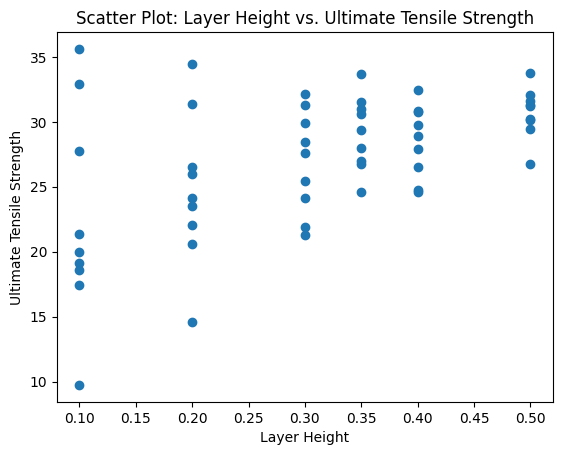

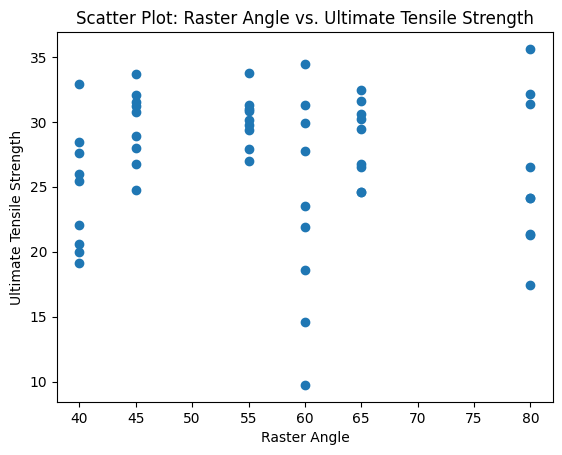

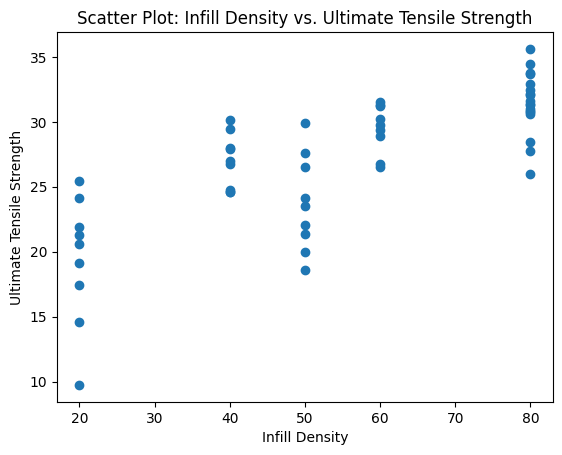

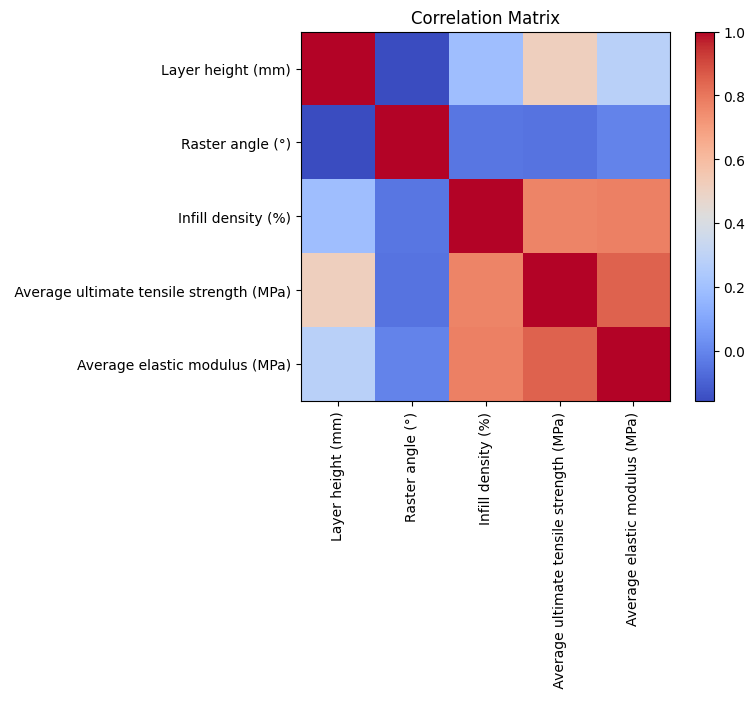

In [151]:
# Visualize the distributions of your variables
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Create scatter plots to identify patterns or trends
plt.scatter(df['Layer height (mm)'], df[' Average ultimate tensile strength (MPa)'])
plt.xlabel('Layer Height')
plt.ylabel('Ultimate Tensile Strength')
plt.title('Scatter Plot: Layer Height vs. Ultimate Tensile Strength')
plt.show()

plt.scatter(df['Raster angle (°)'], df[' Average ultimate tensile strength (MPa)'])
plt.xlabel('Raster Angle')
plt.ylabel('Ultimate Tensile Strength')
plt.title('Scatter Plot: Raster Angle vs. Ultimate Tensile Strength')
plt.show()

plt.scatter(df['Infill density (%)'], df[' Average ultimate tensile strength (MPa)'])
plt.xlabel('Infill Density')
plt.ylabel('Ultimate Tensile Strength')
plt.title('Scatter Plot: Infill Density vs. Ultimate Tensile Strength')
plt.show()

# Create a correlation matrix
correlation_matrix = df.corr()
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.title('Correlation Matrix')
plt.colorbar()
plt.xticks(range(len(df.columns)), df.columns, rotation=90)
plt.yticks(range(len(df.columns)), df.columns)
plt.show()


# Normal probabilty plot

In [152]:
df3=pd.read_excel('/content/drive/MyDrive/FDM_MTP/FDM_tensile_elastic_Predicted_dataset.xlsx')

In [153]:
df3

,Layer height (mm),Raster angle (°),Infill density (%),Average ultimate tensile strength (MPa),predicted,% Error,Average elastic modulus (MPa),Predicted value,Error (%)
0,0.40,45.0,40.0,24.73000,26.28025,6.282450,617.58000,614.890,0.435200
1,0.40,45.0,60.0,28.89000,28.94925,0.204260,635.98000,645.090,1.432400
2,0.40,45.0,80.0,30.78000,31.49025,2.308870,714.64000,716.410,0.248400
3,0.40,55.0,40.0,27.93000,26.53225,5.010840,617.98000,605.390,2.037600
4,0.40,55.0,60.0,29.76000,29.11525,2.169100,633.26000,637.030,0.595400
5,0.40,55.0,80.0,30.80000,31.57025,2.487170,701.83000,709.790,1.134000
6,0.40,65.0,40.0,24.63000,24.82625,0.809280,575.51000,593.330,3.096600
7,0.40,65.0,60.0,26.51000,27.32325,3.085680,634.07000,626.410,1.208400
8,0.40,65.0,80.0,32.47000,29.69225,8.550570,722.07000,700.610,3.056200
9,0.50,45.0,40.0,26.76000,27.79525,3.862360,653.85000,680.480,4.072600


In [154]:
df3=df3.iloc[:54,:]

In [155]:
df3

,Layer height (mm),Raster angle (°),Infill density (%),Average ultimate tensile strength (MPa),predicted,% Error,Average elastic modulus (MPa),Predicted value,Error (%)
0,0.40,45.0,40.0,24.73000,26.28025,6.282450,617.58000,614.890,0.435200
1,0.40,45.0,60.0,28.89000,28.94925,0.204260,635.98000,645.090,1.432400
2,0.40,45.0,80.0,30.78000,31.49025,2.308870,714.64000,716.410,0.248400
3,0.40,55.0,40.0,27.93000,26.53225,5.010840,617.98000,605.390,2.037600
4,0.40,55.0,60.0,29.76000,29.11525,2.169100,633.26000,637.030,0.595400
5,0.40,55.0,80.0,30.80000,31.57025,2.487170,701.83000,709.790,1.134000
6,0.40,65.0,40.0,24.63000,24.82625,0.809280,575.51000,593.330,3.096600
7,0.40,65.0,60.0,26.51000,27.32325,3.085680,634.07000,626.410,1.208400
8,0.40,65.0,80.0,32.47000,29.69225,8.550570,722.07000,700.610,3.056200
9,0.50,45.0,40.0,26.76000,27.79525,3.862360,653.85000,680.480,4.072600


In [156]:
df3['% Error']

0      6.282450
1      0.204260
2      2.308870
3      5.010840
4      2.169100
5      2.487170
6      0.809280
7      3.085680
8      8.550570
9      3.862360
10     4.305450
11     0.647990
12     2.828900
13     0.077210
14     1.832600
15     2.123770
16     1.702870
17     3.035280
18     2.602730
19     3.999690
20     1.823260
21     0.115570
22     1.315940
23     5.087590
24     0.120130
25     2.457110
26     1.823460
27    18.893379
28     0.249957
29     0.151967
30     4.643604
31     7.710395
32     4.352667
33    10.879805
34    15.292406
35     6.728995
36    40.717782
37    24.718740
38     3.063079
39     9.048537
40     3.772471
41    17.342690
42     7.785601
43    12.953406
44     4.621937
45    11.034608
46    19.061015
47     9.799820
48     9.267182
49     5.352962
50    10.437873
51     4.289321
52     7.145655
53     2.711399
Name: % Error, dtype: float64

In [157]:
'''import scipy.stats as stats
import matplotlib.pyplot as plt

# Create the normal probability plot
stats.probplot(df3['% Error'], plot=plt)

# Set labels and title
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Normal Probability Plot')

# Display the plot
plt.show()
'''

"import scipy.stats as stats\nimport matplotlib.pyplot as plt\n\n# Create the normal probability plot\nstats.probplot(df3['% Error'], plot=plt)\n\n# Set labels and title\nplt.xlabel('Theoretical Quantiles')\nplt.ylabel('Sample Quantiles')\nplt.title('Normal Probability Plot')\n\n# Display the plot\nplt.show()\n"

In [158]:
'''plt.figure(figsize=(8, 6))
# Create the normal probability plot
stats.probplot(df3['Error (%)'], plot=plt)

# Set labels and title
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Normal Probability Plot')

# Display the plot
plt.show()
'''

"plt.figure(figsize=(8, 6))\n# Create the normal probability plot\nstats.probplot(df3['Error (%)'], plot=plt)\n\n# Set labels and title\nplt.xlabel('Theoretical Quantiles')\nplt.ylabel('Sample Quantiles')\nplt.title('Normal Probability Plot')\n\n# Display the plot\nplt.show()\n"

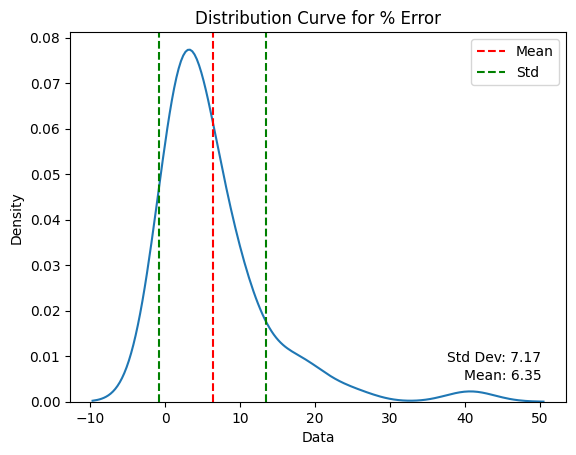

In [159]:
# Calculate mean and standard deviation
mean = np.mean(df3['% Error'])
std = np.std(df3['% Error'])

# Create a distribution curve plot
sns.kdeplot(df3['% Error'])

# Set labels and title
plt.xlabel('Data')
plt.ylabel('Density')
plt.title('Distribution Curve for % Error')

# Add annotations for mean and standard deviation
plt.axvline(mean, color='red', linestyle='--', label='Mean')
plt.axvline(mean + std, color='green', linestyle='--', label='Std')
plt.axvline(mean - std, color='green', linestyle='--')

# Add numerical values in the left corner
plt.text(0.95, 0.05, f'Mean: {mean:.2f}', ha='right', va='bottom', transform=plt.gca().transAxes)
plt.text(0.95, 0.1, f'Std Dev: {std:.2f}', ha='right', va='bottom', transform=plt.gca().transAxes)

# Display the legend
plt.legend()

# Display the plot
plt.show()

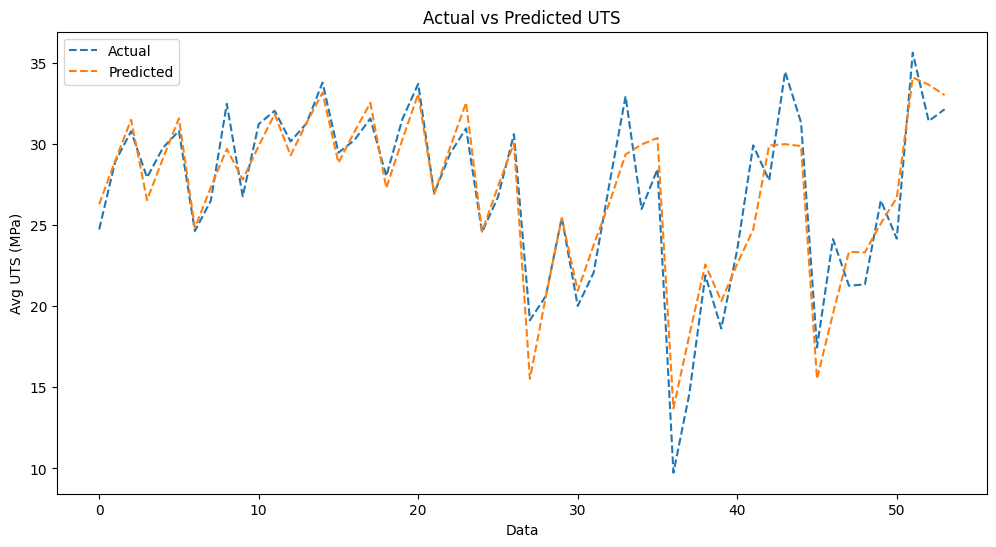

In [160]:
plt.figure(figsize=(12, 6))
plt.plot(df3[' Average ultimate tensile strength (MPa)'], linestyle='--', label='Actual')
plt.plot(df3['predicted'], linestyle='--', label='Predicted')
plt.xlabel('Data')
plt.ylabel('Avg UTS (MPa)')
plt.title('Actual vs Predicted UTS')
plt.legend()
plt.show()

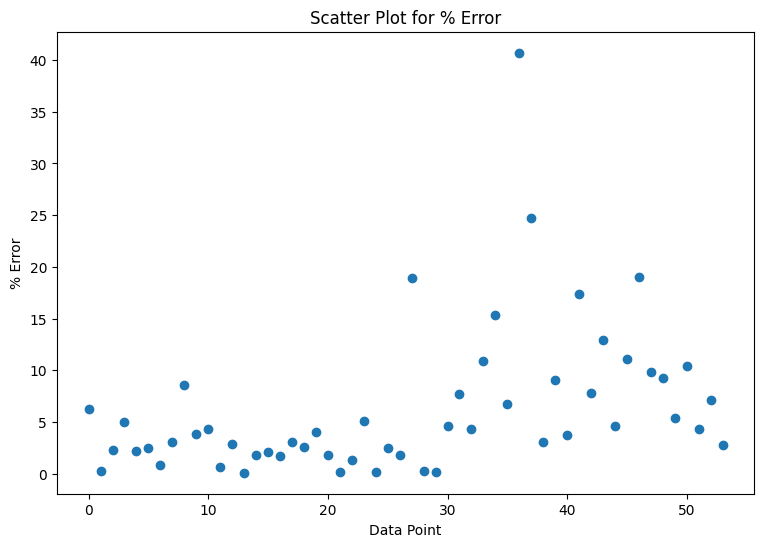

In [161]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,6))
# Scatter plot for % Error
plt.scatter(range(len(df3['% Error'])), df3['% Error'])

# Set labels and title
plt.xlabel('Data Point')
plt.ylabel('% Error')
plt.title('Scatter Plot for % Error')

# Display the plot
plt.show()


In [162]:
df4=pd.read_excel('/content/drive/MyDrive/FDM_MTP/FDM_tensile_elastic_Predicted_dataset2.xlsx')

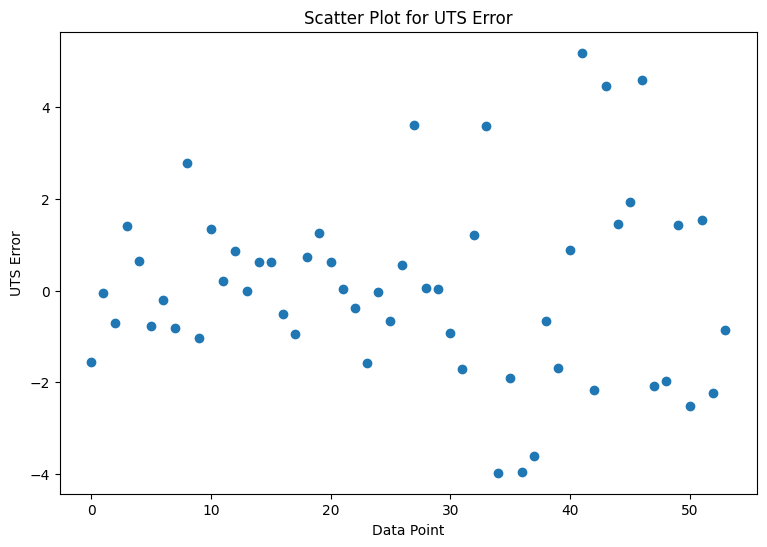

In [163]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,6))
# Scatter plot for % Error
plt.scatter(range(len(df4['UTS error'])), df4['UTS error'])

# Set labels and title
plt.xlabel('Data Point')
plt.ylabel('UTS Error')
plt.title('Scatter Plot for UTS Error')

# Display the plot
plt.show()

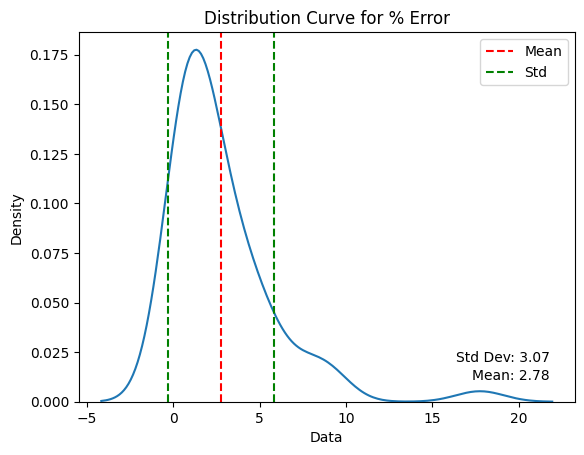

In [164]:
# Calculate mean and standard deviation
mean = np.mean(df3['Error (%)'])
std = np.std(df3['Error (%)'])

# Create a distribution curve plot
sns.kdeplot(df3['Error (%)'])

# Set labels and title
plt.xlabel('Data')
plt.ylabel('Density')
plt.title('Distribution Curve for % Error')

# Add annotations for mean and standard deviation
plt.axvline(mean, color='red', linestyle='--', label='Mean')
plt.axvline(mean + std, color='green', linestyle='--', label='Std')
plt.axvline(mean - std, color='green', linestyle='--')

# Add numerical values in the left corner
plt.text(0.95, 0.05, f'Mean: {mean:.2f}', ha='right', va='bottom', transform=plt.gca().transAxes)
plt.text(0.95, 0.1, f'Std Dev: {std:.2f}', ha='right', va='bottom', transform=plt.gca().transAxes)

# Display the legend
plt.legend()

# Display the plot
plt.show()

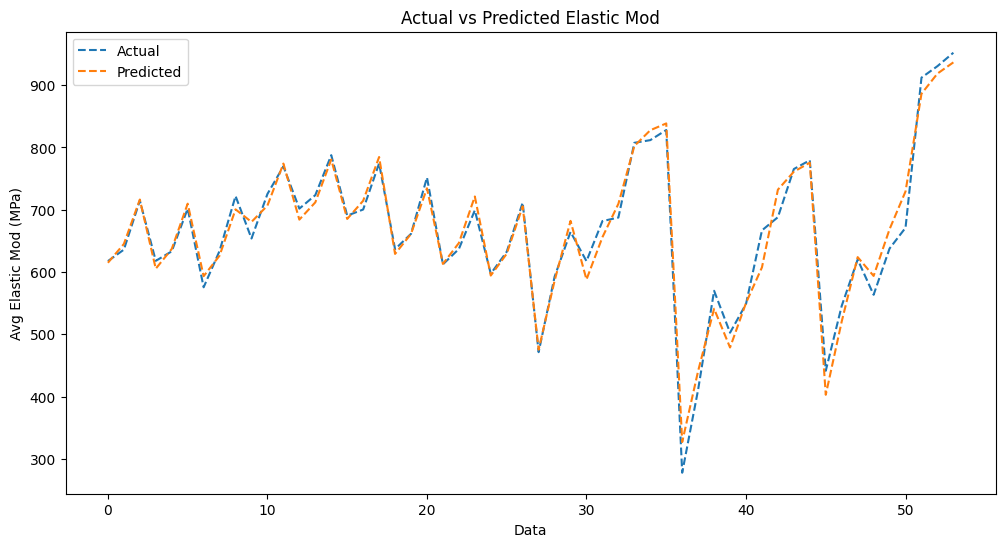

In [165]:
plt.figure(figsize=(12, 6))
plt.plot(df3['Average elastic modulus (MPa)'], linestyle='--', label='Actual')
plt.plot(df3['Predicted value'], linestyle='--', label='Predicted')
plt.xlabel('Data')
plt.ylabel('Avg Elastic Mod (MPa)')
plt.title('Actual vs Predicted Elastic Mod')
plt.legend()
plt.show()

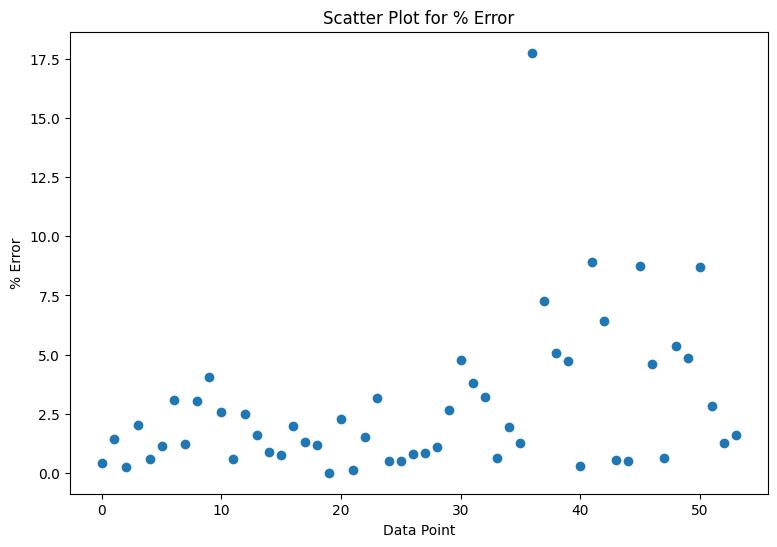

In [166]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,6))
# Scatter plot for % Error
plt.scatter(range(len(df3['Error (%)'])), df3['Error (%)'])

# Set labels and title
plt.xlabel('Data Point')
plt.ylabel('% Error')
plt.title('Scatter Plot for % Error')

# Display the plot
plt.show()


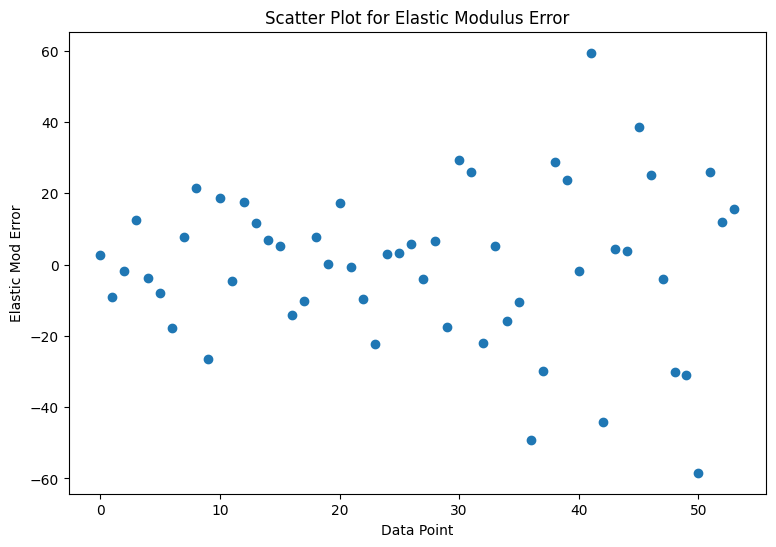

In [167]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,6))
# Scatter plot for % Error
plt.scatter(range(len(df4['EM error'])), df4['EM error'])

# Set labels and title
plt.xlabel('Data Point')
plt.ylabel('Elastic Mod Error')
plt.title('Scatter Plot for Elastic Modulus Error')

# Display the plot
plt.show()